In [1]:
import pandas as pd
import numpy as np
import keras.layers
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from itertools import chain
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def loadData(f_Path):
    df_Fin = pd.read_csv(f_Path)

    pph = df_Fin["Min PPH"]
    df_Fin.drop(["Min PPH"], axis=1, inplace=True)

    X = df_Fin.to_numpy(copy=True)
    y = pph.to_numpy(copy=True)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1512859, random_state=119)

    return X_train, X_test, y_train, y_test


def NNModel(X_train, optimizer, init, loss):
    model = Sequential()

    # Input Layer
    model.add(Dense(128, kernel_initializer="normal",
                    input_dim=X_train.shape[1]))
    model.add(keras.layers.ELU(alpha=1.0))

    # Hidden Layers
    model.add(Dense(128, kernel_initializer=init))
    model.add(keras.layers.ELU(alpha=1.0))

    model.add(Dense(128, kernel_initializer=init))
    model.add(keras.layers.ELU(alpha=1.0))

    model.add(Dense(256, kernel_initializer=init))
    model.add(keras.layers.ELU(alpha=1.0))

    model.add(Dense(256, kernel_initializer=init))
    model.add(keras.layers.ELU(alpha=1.0))

    # Output Layer
    model.add(Dense(1, kernel_initializer=init, activation='linear'))

    model.compile(loss=loss, optimizer=optimizer,
                  metrics=[loss])
    model.summary()

    return model


def trainModel(model, X_train, X_test, y_train, y_test, loss):
    # checkpoint
    # filepath = "C:/Users/amogh/Desktop/weights_best.hdf5"
    # checkpoint = ModelCheckpoint(
    #     filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    # callbacks_list = [checkpoint]

    trained_Model = model.fit(X_train, y_train, validation_data=(
        X_test, y_test), epochs=500, batch_size=15)  # ,callbacks=callbacks_list)
    model_Viz(trained_Model, loss)


def model_Viz(history, loss):
    plt.plot(history.history[str(loss)])
    plt.plot(history.history["val_" + str(loss)])
    plt.title('Model')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
elu_1 (ELU)                  (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
elu_2 (ELU)                  (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
elu_3 (ELU)                  (None, 128)               0         
_________________________________________________________________
dens

8415/8415 [==============================] - 2s 233us/step - loss: 146330863.5793 - mean_squared_error: 146330863.5793 - val_loss: 129671372.8000 - val_mean_squared_error: 129671372.8000
Epoch 31/500
8415/8415 [==============================] - 2s 236us/step - loss: 145569847.9501 - mean_squared_error: 145569847.9501 - val_loss: 131503287.2600 - val_mean_squared_error: 131503287.2600
Epoch 32/500
8415/8415 [==============================] - 2s 236us/step - loss: 149008888.1355 - mean_squared_error: 149008888.1355 - val_loss: 142688355.6200 - val_mean_squared_error: 142688355.6200
Epoch 33/500
8415/8415 [==============================] - 2s 234us/step - loss: 147498234.5009 - mean_squared_error: 147498234.5009 - val_loss: 127065636.1000 - val_mean_squared_error: 127065636.1000
Epoch 34/500
8415/8415 [==============================] - 2s 233us/step - loss: 146586930.6239 - mean_squared_error: 146586930.6239 - val_loss: 127805588.4400 - val_mean_squared_error: 127805588.4400
Epoch 35/500


8415/8415 [==============================] - 2s 224us/step - loss: 141945675.7540 - mean_squared_error: 141945675.7540 - val_loss: 129663614.0600 - val_mean_squared_error: 129663614.0600
Epoch 72/500
8415/8415 [==============================] - 2s 239us/step - loss: 137200317.6078 - mean_squared_error: 137200317.6078 - val_loss: 149856313.2800 - val_mean_squared_error: 149856313.2800
Epoch 73/500
8415/8415 [==============================] - 2s 225us/step - loss: 139128135.2567 - mean_squared_error: 139128135.2567 - val_loss: 125294405.4600 - val_mean_squared_error: 125294405.4600
Epoch 74/500
8415/8415 [==============================] - 2s 227us/step - loss: 134758752.5936 - mean_squared_error: 134758752.5936 - val_loss: 123507686.6400 - val_mean_squared_error: 123507686.6400
Epoch 75/500
8415/8415 [==============================] - 2s 227us/step - loss: 136712279.5490 - mean_squared_error: 136712279.5490 - val_loss: 125224197.2400 - val_mean_squared_error: 125224197.2400
Epoch 76/500


Epoch 112/500
8415/8415 [==============================] - 2s 231us/step - loss: 130400353.8449 - mean_squared_error: 130400353.8449 - val_loss: 131118328.6400 - val_mean_squared_error: 131118328.6400
Epoch 113/500
8415/8415 [==============================] - 2s 230us/step - loss: 129590209.9572 - mean_squared_error: 129590209.9572 - val_loss: 152416634.4200 - val_mean_squared_error: 152416634.4200
Epoch 114/500
8415/8415 [==============================] - 2s 229us/step - loss: 129791527.1373 - mean_squared_error: 129791527.1373 - val_loss: 117162363.0600 - val_mean_squared_error: 117162363.0600
Epoch 115/500
8415/8415 [==============================] - 2s 232us/step - loss: 128152822.6595 - mean_squared_error: 128152822.6595 - val_loss: 123986142.9200 - val_mean_squared_error: 123986142.9200
Epoch 116/500
8415/8415 [==============================] - 2s 228us/step - loss: 131217547.5526 - mean_squared_error: 131217547.5526 - val_loss: 118642077.9800 - val_mean_squared_error: 118642077.

Epoch 153/500
8415/8415 [==============================] - 2s 232us/step - loss: 123919909.9305 - mean_squared_error: 123919909.9305 - val_loss: 120974786.2400 - val_mean_squared_error: 120974786.2400
Epoch 154/500
8415/8415 [==============================] - 2s 243us/step - loss: 127602234.4439 - mean_squared_error: 127602234.4439 - val_loss: 119507125.4400 - val_mean_squared_error: 119507125.4400
Epoch 155/500
8415/8415 [==============================] - 2s 268us/step - loss: 124052351.6399 - mean_squared_error: 124052351.6399 - val_loss: 117850374.5000 - val_mean_squared_error: 117850374.5000
Epoch 156/500
8415/8415 [==============================] - 2s 233us/step - loss: 124321892.9750 - mean_squared_error: 124321892.9750 - val_loss: 121365163.2800 - val_mean_squared_error: 121365163.2800
Epoch 157/500
8415/8415 [==============================] - 2s 229us/step - loss: 122950987.9251 - mean_squared_error: 122950987.9251 - val_loss: 151062472.9600 - val_mean_squared_error: 151062472.

Epoch 194/500
8415/8415 [==============================] - 2s 232us/step - loss: 117739374.8895 - mean_squared_error: 117739374.8895 - val_loss: 114099770.6800 - val_mean_squared_error: 114099770.6800
Epoch 195/500
8415/8415 [==============================] - 2s 239us/step - loss: 119803062.0677 - mean_squared_error: 119803062.0677 - val_loss: 118875982.3400 - val_mean_squared_error: 118875982.3400
Epoch 196/500
8415/8415 [==============================] - 2s 235us/step - loss: 117237626.5062 - mean_squared_error: 117237626.5062 - val_loss: 117373083.7600 - val_mean_squared_error: 117373083.7600
Epoch 197/500
8415/8415 [==============================] - 2s 230us/step - loss: 117691869.4135 - mean_squared_error: 117691869.4135 - val_loss: 128225918.3000 - val_mean_squared_error: 128225918.3000
Epoch 198/500
8415/8415 [==============================] - 2s 229us/step - loss: 118932649.2014 - mean_squared_error: 118932649.2014 - val_loss: 115351803.1200 - val_mean_squared_error: 115351803.

Epoch 235/500
8415/8415 [==============================] - 2s 233us/step - loss: 108376958.7077 - mean_squared_error: 108376958.7077 - val_loss: 121853659.9800 - val_mean_squared_error: 121853659.9800
Epoch 236/500
8415/8415 [==============================] - 2s 233us/step - loss: 111325234.1783 - mean_squared_error: 111325234.1783 - val_loss: 122960606.1400 - val_mean_squared_error: 122960606.1400
Epoch 237/500
8415/8415 [==============================] - 2s 232us/step - loss: 112667745.1408 - mean_squared_error: 112667745.1408 - val_loss: 122267276.3000 - val_mean_squared_error: 122267276.3000
Epoch 238/500
8415/8415 [==============================] - 2s 233us/step - loss: 108752691.8895 - mean_squared_error: 108752691.8895 - val_loss: 121981857.2000 - val_mean_squared_error: 121981857.2000
Epoch 239/500
8415/8415 [==============================] - 2s 234us/step - loss: 108668817.9733 - mean_squared_error: 108668817.9733 - val_loss: 119491085.1400 - val_mean_squared_error: 119491085.

Epoch 276/500
8415/8415 [==============================] - 2s 238us/step - loss: 105182949.1907 - mean_squared_error: 105182949.1907 - val_loss: 120749689.0600 - val_mean_squared_error: 120749689.0600
Epoch 277/500
8415/8415 [==============================] - 2s 238us/step - loss: 104204786.1319 - mean_squared_error: 104204786.1319 - val_loss: 126904786.7200 - val_mean_squared_error: 126904786.7200
Epoch 278/500
8415/8415 [==============================] - 2s 231us/step - loss: 100359107.5989 - mean_squared_error: 100359107.5989 - val_loss: 113838138.7200 - val_mean_squared_error: 113838138.7200
Epoch 279/500
8415/8415 [==============================] - 2s 228us/step - loss: 102338148.8948 - mean_squared_error: 102338148.8948 - val_loss: 123301031.9800 - val_mean_squared_error: 123301031.9800
Epoch 280/500
8415/8415 [==============================] - 2s 229us/step - loss: 103923231.9251 - mean_squared_error: 103923231.9251 - val_loss: 123918821.9400 - val_mean_squared_error: 123918821.

Epoch 317/500
8415/8415 [==============================] - 2s 231us/step - loss: 94326784.3797 - mean_squared_error: 94326784.3797 - val_loss: 140209477.4200 - val_mean_squared_error: 140209477.4200
Epoch 318/500
8415/8415 [==============================] - 2s 231us/step - loss: 111652963.7576 - mean_squared_error: 111652963.7576 - val_loss: 120126035.6200 - val_mean_squared_error: 120126035.6200
Epoch 319/500
8415/8415 [==============================] - 2s 230us/step - loss: 92072547.2852 - mean_squared_error: 92072547.2852 - val_loss: 122248314.5000 - val_mean_squared_error: 122248314.5000
Epoch 320/500
8415/8415 [==============================] - 2s 231us/step - loss: 106295905.0285 - mean_squared_error: 106295905.0285 - val_loss: 124356141.7200 - val_mean_squared_error: 124356141.7200
Epoch 321/500
8415/8415 [==============================] - 2s 229us/step - loss: 101025925.3939 - mean_squared_error: 101025925.3939 - val_loss: 112555571.6200 - val_mean_squared_error: 112555571.6200

8415/8415 [==============================] - 2s 230us/step - loss: 76177432.9875 - mean_squared_error: 76177432.9875 - val_loss: 138676227.9900 - val_mean_squared_error: 138676227.9900
Epoch 400/500
8415/8415 [==============================] - 2s 230us/step - loss: 75017382.0428 - mean_squared_error: 75017382.0428 - val_loss: 119137497.4500 - val_mean_squared_error: 119137497.4500
Epoch 401/500
8415/8415 [==============================] - 2s 230us/step - loss: 75955704.3209 - mean_squared_error: 75955704.3209 - val_loss: 133767246.4800 - val_mean_squared_error: 133767246.4800
Epoch 402/500
8415/8415 [==============================] - 2s 229us/step - loss: 75004795.6337 - mean_squared_error: 75004795.6337 - val_loss: 124065124.6300 - val_mean_squared_error: 124065124.6300
Epoch 403/500
8415/8415 [==============================] - 2s 232us/step - loss: 77359093.4599 - mean_squared_error: 77359093.4599 - val_loss: 136584751.5200 - val_mean_squared_error: 136584751.5200
Epoch 404/500
8415/

8415/8415 [==============================] - 2s 233us/step - loss: 77016302.4020 - mean_squared_error: 77016302.4020 - val_loss: 139722200.0800 - val_mean_squared_error: 139722200.0800
Epoch 482/500
8415/8415 [==============================] - 2s 240us/step - loss: 59920244.3636 - mean_squared_error: 59920244.3636 - val_loss: 127431987.6400 - val_mean_squared_error: 127431987.6400
Epoch 483/500
8415/8415 [==============================] - 2s 236us/step - loss: 60648551.8877 - mean_squared_error: 60648551.8877 - val_loss: 121551494.3200 - val_mean_squared_error: 121551494.3200
Epoch 484/500
8415/8415 [==============================] - 2s 238us/step - loss: 60022575.6827 - mean_squared_error: 60022575.6827 - val_loss: 120803119.2200 - val_mean_squared_error: 120803119.2200
Epoch 485/500
8415/8415 [==============================] - 2s 229us/step - loss: 62398157.9840 - mean_squared_error: 62398157.9840 - val_loss: 129945702.1000 - val_mean_squared_error: 129945702.1000
Epoch 486/500
8415/

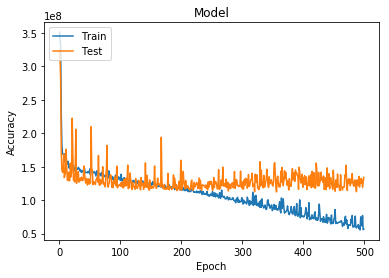

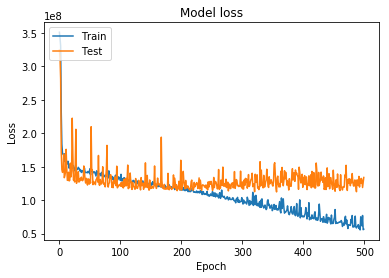

Optimizer: adam, Initializer: glorot_uniform, Loss: mean_squared_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               4224      
_________________________________________________________________
elu_6 (ELU)                  (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
elu_7 (ELU)                  (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
elu_8 (ELU)                  (None, 128)               0         
_________________________________________________________________
dense

8415/8415 [==============================] - 2s 248us/step - loss: 7415.1421 - mean_absolute_error: 7415.1421 - val_loss: 7558.2710 - val_mean_absolute_error: 7558.2710
Epoch 81/500
8415/8415 [==============================] - 2s 243us/step - loss: 7476.1247 - mean_absolute_error: 7476.1247 - val_loss: 7361.6235 - val_mean_absolute_error: 7361.6235
Epoch 82/500
8415/8415 [==============================] - 2s 235us/step - loss: 7477.4587 - mean_absolute_error: 7477.4587 - val_loss: 7284.5600 - val_mean_absolute_error: 7284.5600
Epoch 83/500
8415/8415 [==============================] - 2s 240us/step - loss: 7562.5005 - mean_absolute_error: 7562.5005 - val_loss: 7273.5040 - val_mean_absolute_error: 7273.5040
Epoch 84/500
8415/8415 [==============================] - 2s 252us/step - loss: 7428.7924 - mean_absolute_error: 7428.7924 - val_loss: 7344.6973 - val_mean_absolute_error: 7344.6973
Epoch 85/500
8415/8415 [==============================] - 2s 251us/step - loss: 7447.1318 - mean_absolu

Epoch 125/500
8415/8415 [==============================] - 2s 229us/step - loss: 7232.4619 - mean_absolute_error: 7232.4619 - val_loss: 7152.9850 - val_mean_absolute_error: 7152.9850
Epoch 126/500
8415/8415 [==============================] - 2s 247us/step - loss: 7261.4905 - mean_absolute_error: 7261.4905 - val_loss: 7146.8500 - val_mean_absolute_error: 7146.8500
Epoch 127/500
8415/8415 [==============================] - 2s 235us/step - loss: 7255.8463 - mean_absolute_error: 7255.8463 - val_loss: 7834.6082 - val_mean_absolute_error: 7834.6082
Epoch 128/500
8415/8415 [==============================] - 2s 230us/step - loss: 7218.0649 - mean_absolute_error: 7218.0649 - val_loss: 7214.3030 - val_mean_absolute_error: 7214.3030
Epoch 129/500
8415/8415 [==============================] - 2s 231us/step - loss: 7324.0129 - mean_absolute_error: 7324.0129 - val_loss: 7207.2122 - val_mean_absolute_error: 7207.2122
Epoch 130/500
8415/8415 [==============================] - 2s 231us/step - loss: 7172

Epoch 170/500
8415/8415 [==============================] - 2s 230us/step - loss: 7153.8967 - mean_absolute_error: 7153.8967 - val_loss: 9388.4761 - val_mean_absolute_error: 9388.4761
Epoch 171/500
8415/8415 [==============================] - 2s 237us/step - loss: 7096.3281 - mean_absolute_error: 7096.3281 - val_loss: 7191.1675 - val_mean_absolute_error: 7191.1675
Epoch 172/500
8415/8415 [==============================] - 2s 232us/step - loss: 7061.2686 - mean_absolute_error: 7061.2686 - val_loss: 7145.0347 - val_mean_absolute_error: 7145.0347
Epoch 173/500
8415/8415 [==============================] - 2s 229us/step - loss: 7057.8088 - mean_absolute_error: 7057.8088 - val_loss: 7142.8785 - val_mean_absolute_error: 7142.8785
Epoch 174/500
8415/8415 [==============================] - 2s 232us/step - loss: 6988.8432 - mean_absolute_error: 6988.8432 - val_loss: 7082.8820 - val_mean_absolute_error: 7082.8820
Epoch 175/500
8415/8415 [==============================] - 2s 232us/step - loss: 7001

Epoch 215/500
8415/8415 [==============================] - 2s 232us/step - loss: 6934.0493 - mean_absolute_error: 6934.0493 - val_loss: 7624.7989 - val_mean_absolute_error: 7624.7989
Epoch 216/500
8415/8415 [==============================] - 2s 230us/step - loss: 6848.9513 - mean_absolute_error: 6848.9513 - val_loss: 6974.1726 - val_mean_absolute_error: 6974.1726
Epoch 217/500
8415/8415 [==============================] - 2s 230us/step - loss: 6809.4587 - mean_absolute_error: 6809.4587 - val_loss: 7273.7771 - val_mean_absolute_error: 7273.7771
Epoch 218/500
8415/8415 [==============================] - 2s 231us/step - loss: 6786.0550 - mean_absolute_error: 6786.0550 - val_loss: 7469.1600 - val_mean_absolute_error: 7469.1600
Epoch 219/500
8415/8415 [==============================] - 2s 231us/step - loss: 6848.2681 - mean_absolute_error: 6848.2681 - val_loss: 7185.8957 - val_mean_absolute_error: 7185.8957
Epoch 220/500
8415/8415 [==============================] - 2s 232us/step - loss: 6783

Epoch 304/500
8415/8415 [==============================] - 2s 247us/step - loss: 6297.2798 - mean_absolute_error: 6297.2798 - val_loss: 6865.2661 - val_mean_absolute_error: 6865.2661
Epoch 305/500
8415/8415 [==============================] - 2s 254us/step - loss: 6275.6359 - mean_absolute_error: 6275.6359 - val_loss: 7345.9834 - val_mean_absolute_error: 7345.9834
Epoch 306/500
8415/8415 [==============================] - 2s 229us/step - loss: 6281.1117 - mean_absolute_error: 6281.1117 - val_loss: 6984.1850 - val_mean_absolute_error: 6984.1850
Epoch 307/500
8415/8415 [==============================] - 2s 229us/step - loss: 6210.6119 - mean_absolute_error: 6210.6119 - val_loss: 7081.0994 - val_mean_absolute_error: 7081.0994
Epoch 308/500
8415/8415 [==============================] - 2s 230us/step - loss: 6276.2773 - mean_absolute_error: 6276.2773 - val_loss: 7014.2078 - val_mean_absolute_error: 7014.2078
Epoch 309/500
8415/8415 [==============================] - 2s 229us/step - loss: 6241

Epoch 349/500
8415/8415 [==============================] - 2s 235us/step - loss: 5968.8865 - mean_absolute_error: 5968.8865 - val_loss: 7032.9859 - val_mean_absolute_error: 7032.9859
Epoch 350/500
8415/8415 [==============================] - 2s 238us/step - loss: 6041.0439 - mean_absolute_error: 6041.0439 - val_loss: 7171.5039 - val_mean_absolute_error: 7171.5039
Epoch 351/500
8415/8415 [==============================] - 2s 244us/step - loss: 6021.7317 - mean_absolute_error: 6021.7317 - val_loss: 7263.7282 - val_mean_absolute_error: 7263.7282
Epoch 352/500
8415/8415 [==============================] - 2s 235us/step - loss: 6025.8999 - mean_absolute_error: 6025.8999 - val_loss: 7015.3637 - val_mean_absolute_error: 7015.3637
Epoch 353/500
8415/8415 [==============================] - 2s 231us/step - loss: 5898.3481 - mean_absolute_error: 5898.3481 - val_loss: 7064.3437 - val_mean_absolute_error: 7064.3437
Epoch 354/500
8415/8415 [==============================] - 2s 250us/step - loss: 5929

Epoch 394/500
8415/8415 [==============================] - 2s 229us/step - loss: 5628.4447 - mean_absolute_error: 5628.4447 - val_loss: 7062.6423 - val_mean_absolute_error: 7062.6423
Epoch 395/500
8415/8415 [==============================] - 2s 228us/step - loss: 5704.0216 - mean_absolute_error: 5704.0216 - val_loss: 7344.0944 - val_mean_absolute_error: 7344.0944
Epoch 396/500
8415/8415 [==============================] - 2s 231us/step - loss: 5695.4949 - mean_absolute_error: 5695.4949 - val_loss: 7036.4348 - val_mean_absolute_error: 7036.4348
Epoch 397/500
8415/8415 [==============================] - 2s 226us/step - loss: 5623.7503 - mean_absolute_error: 5623.7503 - val_loss: 7426.1265 - val_mean_absolute_error: 7426.1265
Epoch 398/500
8415/8415 [==============================] - 2s 227us/step - loss: 5660.1468 - mean_absolute_error: 5660.1468 - val_loss: 7280.9907 - val_mean_absolute_error: 7280.9907
Epoch 399/500
8415/8415 [==============================] - 2s 231us/step - loss: 5715

Epoch 439/500
8415/8415 [==============================] - 2s 234us/step - loss: 5496.8971 - mean_absolute_error: 5496.8971 - val_loss: 7054.8459 - val_mean_absolute_error: 7054.8459
Epoch 440/500
8415/8415 [==============================] - 2s 233us/step - loss: 5326.3594 - mean_absolute_error: 5326.3594 - val_loss: 7006.2817 - val_mean_absolute_error: 7006.2817
Epoch 441/500
8415/8415 [==============================] - 2s 235us/step - loss: 5379.4754 - mean_absolute_error: 5379.4754 - val_loss: 7053.8355 - val_mean_absolute_error: 7053.8355
Epoch 442/500
8415/8415 [==============================] - 2s 234us/step - loss: 5379.0363 - mean_absolute_error: 5379.0363 - val_loss: 7055.5455 - val_mean_absolute_error: 7055.5455
Epoch 443/500
8415/8415 [==============================] - 2s 232us/step - loss: 5434.8892 - mean_absolute_error: 5434.8892 - val_loss: 7208.7323 - val_mean_absolute_error: 7208.7323
Epoch 444/500
8415/8415 [==============================] - 2s 240us/step - loss: 5361

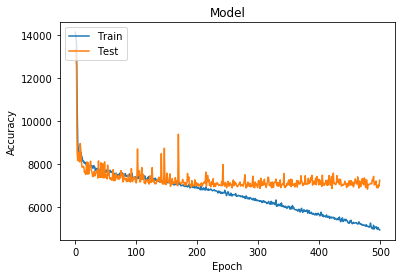

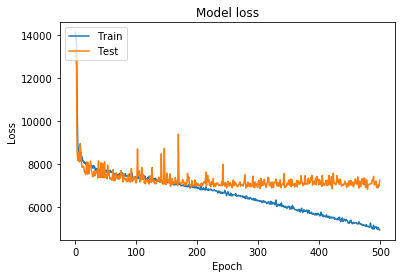

Optimizer: adam, Initializer: glorot_uniform, Loss: mean_absolute_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               4224      
_________________________________________________________________
elu_11 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_12 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_13 (ELU)                 (None, 128)               0         
_________________________________________________________________
dens

8415/8415 [==============================] - 2s 245us/step - loss: 136095842.1337 - mean_squared_error: 136095842.1337 - val_loss: 127901686.8600 - val_mean_squared_error: 127901686.8600
Epoch 74/500
8415/8415 [==============================] - 2s 249us/step - loss: 134495427.3832 - mean_squared_error: 134495427.3832 - val_loss: 126470426.0400 - val_mean_squared_error: 126470426.0400
Epoch 75/500
8415/8415 [==============================] - 2s 231us/step - loss: 134212295.7914 - mean_squared_error: 134212295.7914 - val_loss: 125298294.3200 - val_mean_squared_error: 125298294.3200
Epoch 76/500
8415/8415 [==============================] - 2s 235us/step - loss: 137182425.4029 - mean_squared_error: 137182425.4029 - val_loss: 140335351.7200 - val_mean_squared_error: 140335351.7200
Epoch 77/500
8415/8415 [==============================] - 2s 231us/step - loss: 134709691.5579 - mean_squared_error: 134709691.5579 - val_loss: 129920709.5600 - val_mean_squared_error: 129920709.5600
Epoch 78/500


Epoch 114/500
8415/8415 [==============================] - 2s 230us/step - loss: 127777165.0357 - mean_squared_error: 127777165.0357 - val_loss: 123687792.9000 - val_mean_squared_error: 123687792.9000
Epoch 115/500
8415/8415 [==============================] - 2s 232us/step - loss: 127691106.3458 - mean_squared_error: 127691106.3458 - val_loss: 121993735.5400 - val_mean_squared_error: 121993735.5400
Epoch 116/500
8415/8415 [==============================] - 2s 233us/step - loss: 127663570.8342 - mean_squared_error: 127663570.8342 - val_loss: 124601713.5000 - val_mean_squared_error: 124601713.5000
Epoch 117/500
8415/8415 [==============================] - 2s 239us/step - loss: 130274265.5080 - mean_squared_error: 130274265.5080 - val_loss: 120140895.3600 - val_mean_squared_error: 120140895.3600
Epoch 118/500
8415/8415 [==============================] - 2s 234us/step - loss: 130622515.7932 - mean_squared_error: 130622515.7932 - val_loss: 135879992.9600 - val_mean_squared_error: 135879992.

Epoch 155/500
8415/8415 [==============================] - 2s 240us/step - loss: 122739358.7201 - mean_squared_error: 122739358.7201 - val_loss: 118209127.9800 - val_mean_squared_error: 118209127.9800
Epoch 156/500
8415/8415 [==============================] - 2s 235us/step - loss: 121625570.7843 - mean_squared_error: 121625570.7843 - val_loss: 117213395.8400 - val_mean_squared_error: 117213395.8400
Epoch 157/500
8415/8415 [==============================] - 2s 228us/step - loss: 119488825.8111 - mean_squared_error: 119488825.8111 - val_loss: 119620151.7000 - val_mean_squared_error: 119620151.7000
Epoch 158/500
8415/8415 [==============================] - 2s 231us/step - loss: 120422895.0677 - mean_squared_error: 120422895.0677 - val_loss: 137778516.4400 - val_mean_squared_error: 137778516.4400
Epoch 159/500
8415/8415 [==============================] - 2s 231us/step - loss: 120383177.5579 - mean_squared_error: 120383177.5579 - val_loss: 120452390.0000 - val_mean_squared_error: 120452390.

Epoch 236/500
8415/8415 [==============================] - 2s 236us/step - loss: 106515752.4724 - mean_squared_error: 106515752.4724 - val_loss: 125644674.7000 - val_mean_squared_error: 125644674.7000
Epoch 237/500
8415/8415 [==============================] - 2s 233us/step - loss: 110225781.6275 - mean_squared_error: 110225781.6275 - val_loss: 148265420.0000 - val_mean_squared_error: 148265420.0000
Epoch 238/500
8415/8415 [==============================] - 2s 232us/step - loss: 107364876.8182 - mean_squared_error: 107364876.8182 - val_loss: 117741956.4000 - val_mean_squared_error: 117741956.4000
Epoch 239/500
8415/8415 [==============================] - 2s 234us/step - loss: 105037417.4349 - mean_squared_error: 105037417.4349 - val_loss: 123689059.1900 - val_mean_squared_error: 123689059.1900
Epoch 240/500
8415/8415 [==============================] - 2s 234us/step - loss: 105448147.0321 - mean_squared_error: 105448147.0321 - val_loss: 121444054.2600 - val_mean_squared_error: 121444054.

Epoch 277/500
8415/8415 [==============================] - 2s 238us/step - loss: 97457887.9822 - mean_squared_error: 97457887.9822 - val_loss: 113190961.5600 - val_mean_squared_error: 113190961.5600
Epoch 278/500
8415/8415 [==============================] - 2s 235us/step - loss: 98396332.1444 - mean_squared_error: 98396332.1444 - val_loss: 120857456.9200 - val_mean_squared_error: 120857456.9200
Epoch 279/500
8415/8415 [==============================] - 2s 234us/step - loss: 95968889.2888 - mean_squared_error: 95968889.2888 - val_loss: 131439989.0100 - val_mean_squared_error: 131439989.0100
Epoch 280/500
8415/8415 [==============================] - 2s 233us/step - loss: 97671023.8093 - mean_squared_error: 97671023.8093 - val_loss: 134639292.6800 - val_mean_squared_error: 134639292.6800
Epoch 281/500
8415/8415 [==============================] - 2s 238us/step - loss: 95795608.1640 - mean_squared_error: 95795608.1640 - val_loss: 123061496.7000 - val_mean_squared_error: 123061496.7000
Epoch

8415/8415 [==============================] - 2s 227us/step - loss: 87440502.2032 - mean_squared_error: 87440502.2032 - val_loss: 122328087.9400 - val_mean_squared_error: 122328087.9400
Epoch 360/500
8415/8415 [==============================] - 2s 233us/step - loss: 86016196.8877 - mean_squared_error: 86016196.8877 - val_loss: 116504648.9000 - val_mean_squared_error: 116504648.9000
Epoch 361/500
8415/8415 [==============================] - 2s 232us/step - loss: 76270016.8734 - mean_squared_error: 76270016.8734 - val_loss: 117233823.9400 - val_mean_squared_error: 117233823.9400
Epoch 362/500
8415/8415 [==============================] - 2s 236us/step - loss: 80739631.6506 - mean_squared_error: 80739631.6506 - val_loss: 125841973.6400 - val_mean_squared_error: 125841973.6400
Epoch 363/500
8415/8415 [==============================] - 2s 237us/step - loss: 75841813.0160 - mean_squared_error: 75841813.0160 - val_loss: 159512424.4000 - val_mean_squared_error: 159512424.4000
Epoch 364/500
8415/

8415/8415 [==============================] - 2s 230us/step - loss: 61775081.5784 - mean_squared_error: 61775081.5784 - val_loss: 124992592.1400 - val_mean_squared_error: 124992592.1400
Epoch 442/500
8415/8415 [==============================] - 2s 234us/step - loss: 61333226.0107 - mean_squared_error: 61333226.0107 - val_loss: 110252197.3400 - val_mean_squared_error: 110252197.3400
Epoch 443/500
8415/8415 [==============================] - 2s 233us/step - loss: 85632324.0740 - mean_squared_error: 85632324.0740 - val_loss: 110611175.6400 - val_mean_squared_error: 110611175.6400
Epoch 444/500
8415/8415 [==============================] - 2s 232us/step - loss: 58735543.3146 - mean_squared_error: 58735543.3146 - val_loss: 113795148.5000 - val_mean_squared_error: 113795148.5000
Epoch 445/500
8415/8415 [==============================] - 2s 231us/step - loss: 54463280.6586 - mean_squared_error: 54463280.6586 - val_loss: 113808832.0700 - val_mean_squared_error: 113808832.0700
Epoch 446/500
8415/

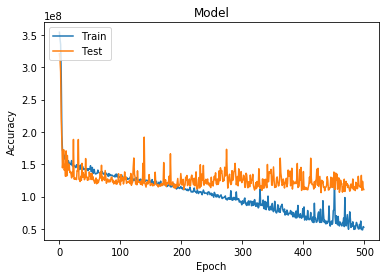

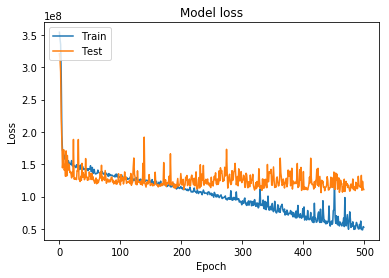

Optimizer: adam, Initializer: normal, Loss: mean_squared_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               4224      
_________________________________________________________________
elu_16 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_17 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_18 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_22 (Den

8415/8415 [==============================] - 2s 247us/step - loss: 7532.2032 - mean_absolute_error: 7532.2032 - val_loss: 8004.7246 - val_mean_absolute_error: 8004.7246
Epoch 81/500
8415/8415 [==============================] - 2s 243us/step - loss: 7485.4858 - mean_absolute_error: 7485.4858 - val_loss: 7286.5061 - val_mean_absolute_error: 7286.5061
Epoch 82/500
8415/8415 [==============================] - 2s 244us/step - loss: 7499.5200 - mean_absolute_error: 7499.5200 - val_loss: 7322.9925 - val_mean_absolute_error: 7322.9925
Epoch 83/500
8415/8415 [==============================] - 2s 249us/step - loss: 7464.0494 - mean_absolute_error: 7464.0494 - val_loss: 7663.3764 - val_mean_absolute_error: 7663.3764
Epoch 84/500
8415/8415 [==============================] - 2s 237us/step - loss: 7480.5928 - mean_absolute_error: 7480.5928 - val_loss: 7278.0202 - val_mean_absolute_error: 7278.0202
Epoch 85/500
8415/8415 [==============================] - 2s 239us/step - loss: 7508.6548 - mean_absolu

Epoch 125/500
8415/8415 [==============================] - 2s 228us/step - loss: 7283.5358 - mean_absolute_error: 7283.5358 - val_loss: 7514.2453 - val_mean_absolute_error: 7514.2453
Epoch 126/500
8415/8415 [==============================] - 2s 229us/step - loss: 7270.0804 - mean_absolute_error: 7270.0804 - val_loss: 8312.3587 - val_mean_absolute_error: 8312.3587
Epoch 127/500
8415/8415 [==============================] - 2s 232us/step - loss: 7298.8988 - mean_absolute_error: 7298.8988 - val_loss: 7095.1121 - val_mean_absolute_error: 7095.1121
Epoch 128/500
8415/8415 [==============================] - 2s 234us/step - loss: 7289.1224 - mean_absolute_error: 7289.1224 - val_loss: 7361.5901 - val_mean_absolute_error: 7361.5901
Epoch 129/500
8415/8415 [==============================] - 2s 234us/step - loss: 7287.8640 - mean_absolute_error: 7287.8640 - val_loss: 7132.4166 - val_mean_absolute_error: 7132.4166
Epoch 130/500
8415/8415 [==============================] - 2s 231us/step - loss: 7345

Epoch 170/500
8415/8415 [==============================] - 2s 238us/step - loss: 7106.5374 - mean_absolute_error: 7106.5374 - val_loss: 7084.5758 - val_mean_absolute_error: 7084.5758
Epoch 171/500
8415/8415 [==============================] - 2s 254us/step - loss: 7081.7294 - mean_absolute_error: 7081.7294 - val_loss: 7575.5564 - val_mean_absolute_error: 7575.5564
Epoch 172/500
8415/8415 [==============================] - 2s 242us/step - loss: 7055.9598 - mean_absolute_error: 7055.9598 - val_loss: 7076.1970 - val_mean_absolute_error: 7076.1970
Epoch 173/500
8415/8415 [==============================] - 2s 236us/step - loss: 7091.2665 - mean_absolute_error: 7091.2665 - val_loss: 7794.9531 - val_mean_absolute_error: 7794.9531
Epoch 174/500
8415/8415 [==============================] - 2s 236us/step - loss: 7087.2287 - mean_absolute_error: 7087.2287 - val_loss: 7102.8526 - val_mean_absolute_error: 7102.8526
Epoch 175/500
8415/8415 [==============================] - 2s 237us/step - loss: 7069

Epoch 215/500
8415/8415 [==============================] - 2s 241us/step - loss: 6953.9794 - mean_absolute_error: 6953.9794 - val_loss: 6962.1761 - val_mean_absolute_error: 6962.1761
Epoch 216/500
8415/8415 [==============================] - 2s 238us/step - loss: 6894.7605 - mean_absolute_error: 6894.7605 - val_loss: 7044.1910 - val_mean_absolute_error: 7044.1910
Epoch 217/500
8415/8415 [==============================] - 2s 238us/step - loss: 6886.5318 - mean_absolute_error: 6886.5318 - val_loss: 7153.3422 - val_mean_absolute_error: 7153.3422
Epoch 218/500
8415/8415 [==============================] - 2s 238us/step - loss: 6887.3195 - mean_absolute_error: 6887.3195 - val_loss: 7002.9124 - val_mean_absolute_error: 7002.9124
Epoch 219/500
8415/8415 [==============================] - 2s 235us/step - loss: 6884.9663 - mean_absolute_error: 6884.9663 - val_loss: 6953.4889 - val_mean_absolute_error: 6953.4889
Epoch 220/500
8415/8415 [==============================] - 2s 235us/step - loss: 6847

Epoch 260/500
8415/8415 [==============================] - 2s 231us/step - loss: 6761.6698 - mean_absolute_error: 6761.6698 - val_loss: 7073.2379 - val_mean_absolute_error: 7073.2379
Epoch 261/500
8415/8415 [==============================] - 2s 226us/step - loss: 6685.1789 - mean_absolute_error: 6685.1789 - val_loss: 7208.3914 - val_mean_absolute_error: 7208.3914
Epoch 262/500
8415/8415 [==============================] - 2s 231us/step - loss: 6749.1489 - mean_absolute_error: 6749.1489 - val_loss: 6979.5618 - val_mean_absolute_error: 6979.5618
Epoch 263/500
8415/8415 [==============================] - 2s 229us/step - loss: 6728.4789 - mean_absolute_error: 6728.4789 - val_loss: 6999.8947 - val_mean_absolute_error: 6999.8947
Epoch 264/500
8415/8415 [==============================] - 2s 231us/step - loss: 6727.1574 - mean_absolute_error: 6727.1574 - val_loss: 7427.2692 - val_mean_absolute_error: 7427.2692
Epoch 265/500
8415/8415 [==============================] - 2s 231us/step - loss: 6670

Epoch 305/500
8415/8415 [==============================] - 2s 231us/step - loss: 6466.4986 - mean_absolute_error: 6466.4986 - val_loss: 7189.5579 - val_mean_absolute_error: 7189.5579
Epoch 306/500
8415/8415 [==============================] - 2s 228us/step - loss: 6547.3491 - mean_absolute_error: 6547.3491 - val_loss: 7041.7911 - val_mean_absolute_error: 7041.7911
Epoch 307/500
8415/8415 [==============================] - 2s 229us/step - loss: 6477.2825 - mean_absolute_error: 6477.2825 - val_loss: 6895.4119 - val_mean_absolute_error: 6895.4119
Epoch 308/500
8415/8415 [==============================] - 2s 231us/step - loss: 6478.9431 - mean_absolute_error: 6478.9431 - val_loss: 7014.5417 - val_mean_absolute_error: 7014.5417
Epoch 309/500
8415/8415 [==============================] - 2s 233us/step - loss: 6462.9872 - mean_absolute_error: 6462.9872 - val_loss: 7232.3823 - val_mean_absolute_error: 7232.3823
Epoch 310/500
8415/8415 [==============================] - 2s 230us/step - loss: 6436

Epoch 350/500
8415/8415 [==============================] - ETA: 0s - loss: 6335.1738 - mean_absolute_error: 6335.173 - 2s 227us/step - loss: 6328.7746 - mean_absolute_error: 6328.7746 - val_loss: 7405.0500 - val_mean_absolute_error: 7405.0500
Epoch 351/500
8415/8415 [==============================] - 2s 227us/step - loss: 6259.1125 - mean_absolute_error: 6259.1125 - val_loss: 7036.7583 - val_mean_absolute_error: 7036.7583
Epoch 352/500
8415/8415 [==============================] - 2s 232us/step - loss: 6232.7464 - mean_absolute_error: 6232.7464 - val_loss: 7099.2140 - val_mean_absolute_error: 7099.2140
Epoch 353/500
8415/8415 [==============================] - 2s 232us/step - loss: 6248.6087 - mean_absolute_error: 6248.6087 - val_loss: 7211.0741 - val_mean_absolute_error: 7211.0741
Epoch 354/500
8415/8415 [==============================] - 2s 233us/step - loss: 6181.4303 - mean_absolute_error: 6181.4303 - val_loss: 7036.0261 - val_mean_absolute_error: 7036.0261
Epoch 355/500
8415/8415 [

Epoch 439/500
8415/8415 [==============================] - 2s 232us/step - loss: 5720.0094 - mean_absolute_error: 5720.0094 - val_loss: 7313.2301 - val_mean_absolute_error: 7313.2301
Epoch 440/500
8415/8415 [==============================] - 2s 233us/step - loss: 5651.5916 - mean_absolute_error: 5651.5916 - val_loss: 7141.2359 - val_mean_absolute_error: 7141.2359
Epoch 441/500
8415/8415 [==============================] - 2s 231us/step - loss: 5725.2847 - mean_absolute_error: 5725.2847 - val_loss: 7274.8910 - val_mean_absolute_error: 7274.8910
Epoch 442/500
8415/8415 [==============================] - 2s 234us/step - loss: 5622.1441 - mean_absolute_error: 5622.1441 - val_loss: 7553.1740 - val_mean_absolute_error: 7553.1740
Epoch 443/500
8415/8415 [==============================] - 2s 234us/step - loss: 5658.7260 - mean_absolute_error: 5658.7260 - val_loss: 7144.9970 - val_mean_absolute_error: 7144.9970
Epoch 444/500
8415/8415 [==============================] - 2s 229us/step - loss: 5700

Epoch 484/500
8415/8415 [==============================] - 2s 236us/step - loss: 5452.6368 - mean_absolute_error: 5452.6368 - val_loss: 7313.7139 - val_mean_absolute_error: 7313.7139
Epoch 485/500
8415/8415 [==============================] - 2s 243us/step - loss: 5433.3415 - mean_absolute_error: 5433.3415 - val_loss: 7302.2412 - val_mean_absolute_error: 7302.2412
Epoch 486/500
8415/8415 [==============================] - 2s 251us/step - loss: 5426.8266 - mean_absolute_error: 5426.8266 - val_loss: 7472.1182 - val_mean_absolute_error: 7472.1182
Epoch 487/500
8415/8415 [==============================] - 2s 242us/step - loss: 5377.9011 - mean_absolute_error: 5377.9011 - val_loss: 7299.3634 - val_mean_absolute_error: 7299.3634
Epoch 488/500
8415/8415 [==============================] - 2s 233us/step - loss: 5437.8093 - mean_absolute_error: 5437.8093 - val_loss: 7667.9102 - val_mean_absolute_error: 7667.9102
Epoch 489/500
8415/8415 [==============================] - 2s 237us/step - loss: 5374

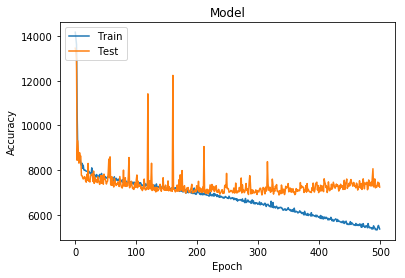

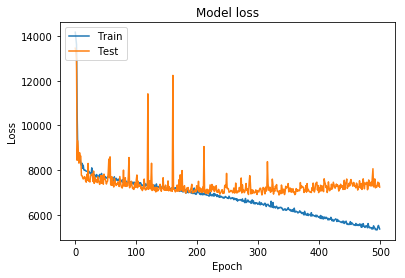

Optimizer: adam, Initializer: normal, Loss: mean_absolute_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               4224      
_________________________________________________________________
elu_21 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_22 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_23 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_28 (De

8415/8415 [==============================] - 2s 232us/step - loss: 132232274.1408 - mean_squared_error: 132232274.1408 - val_loss: 127160616.8800 - val_mean_squared_error: 127160616.8800
Epoch 74/500
8415/8415 [==============================] - 2s 231us/step - loss: 136146451.2531 - mean_squared_error: 136146451.2531 - val_loss: 218029279.9200 - val_mean_squared_error: 218029279.9200
Epoch 75/500
8415/8415 [==============================] - 2s 237us/step - loss: 141770027.2549 - mean_squared_error: 141770027.2549 - val_loss: 120795081.6400 - val_mean_squared_error: 120795081.6400
Epoch 76/500
8415/8415 [==============================] - 2s 230us/step - loss: 134490779.3102 - mean_squared_error: 134490779.3102 - val_loss: 124786752.3200 - val_mean_squared_error: 124786752.3200
Epoch 77/500
8415/8415 [==============================] - 2s 229us/step - loss: 135709502.0481 - mean_squared_error: 135709502.0481 - val_loss: 121651869.5600 - val_mean_squared_error: 121651869.5600
Epoch 78/500


Epoch 114/500
8415/8415 [==============================] - 2s 229us/step - loss: 127069934.6292 - mean_squared_error: 127069934.6292 - val_loss: 124741409.9600 - val_mean_squared_error: 124741409.9600
Epoch 115/500
8415/8415 [==============================] - 2s 229us/step - loss: 128899983.6863 - mean_squared_error: 128899983.6863 - val_loss: 123024464.4600 - val_mean_squared_error: 123024464.4600
Epoch 116/500
8415/8415 [==============================] - 2s 230us/step - loss: 130054400.3066 - mean_squared_error: 130054400.3066 - val_loss: 125167430.0400 - val_mean_squared_error: 125167430.0400
Epoch 117/500
8415/8415 [==============================] - 2s 234us/step - loss: 131999765.0909 - mean_squared_error: 131999765.0909 - val_loss: 133438158.7200 - val_mean_squared_error: 133438158.7200
Epoch 118/500
8415/8415 [==============================] - 2s 230us/step - loss: 128100072.0713 - mean_squared_error: 128100072.0713 - val_loss: 162992473.6400 - val_mean_squared_error: 162992473.

Epoch 155/500
8415/8415 [==============================] - 2s 231us/step - loss: 123897446.0374 - mean_squared_error: 123897446.0374 - val_loss: 123354659.0800 - val_mean_squared_error: 123354659.0800
Epoch 156/500
8415/8415 [==============================] - 2s 232us/step - loss: 122496354.4349 - mean_squared_error: 122496354.4349 - val_loss: 126457094.1800 - val_mean_squared_error: 126457094.1800
Epoch 157/500
8415/8415 [==============================] - 2s 230us/step - loss: 122893687.9109 - mean_squared_error: 122893687.9109 - val_loss: 142029157.8400 - val_mean_squared_error: 142029157.8400
Epoch 158/500
8415/8415 [==============================] - 2s 228us/step - loss: 122873998.3565 - mean_squared_error: 122873998.3565 - val_loss: 121268875.4200 - val_mean_squared_error: 121268875.4200
Epoch 159/500
8415/8415 [==============================] - 2s 230us/step - loss: 122262440.6578 - mean_squared_error: 122262440.6578 - val_loss: 120890144.2600 - val_mean_squared_error: 120890144.

Epoch 196/500
8415/8415 [==============================] - 2s 236us/step - loss: 118129232.9055 - mean_squared_error: 118129232.9055 - val_loss: 114336325.7000 - val_mean_squared_error: 114336325.7000
Epoch 197/500
8415/8415 [==============================] - 2s 227us/step - loss: 115109231.2656 - mean_squared_error: 115109231.2656 - val_loss: 113555720.4200 - val_mean_squared_error: 113555720.4200
Epoch 198/500
8415/8415 [==============================] - 2s 228us/step - loss: 117331696.5544 - mean_squared_error: 117331696.5544 - val_loss: 119889733.8000 - val_mean_squared_error: 119889733.8000
Epoch 199/500
8415/8415 [==============================] - 2s 230us/step - loss: 115271470.4403 - mean_squared_error: 115271470.4403 - val_loss: 119017733.1200 - val_mean_squared_error: 119017733.1200
Epoch 200/500
8415/8415 [==============================] - 2s 228us/step - loss: 116759118.2763 - mean_squared_error: 116759118.2763 - val_loss: 123828576.3400 - val_mean_squared_error: 123828576.

Epoch 237/500
8415/8415 [==============================] - 2s 231us/step - loss: 113575661.6720 - mean_squared_error: 113575661.6720 - val_loss: 116617707.5200 - val_mean_squared_error: 116617707.5200
Epoch 238/500
8415/8415 [==============================] - 2s 228us/step - loss: 109464701.5152 - mean_squared_error: 109464701.5152 - val_loss: 119086976.9200 - val_mean_squared_error: 119086976.9200
Epoch 239/500
8415/8415 [==============================] - 2s 227us/step - loss: 112223026.7308 - mean_squared_error: 112223026.7308 - val_loss: 125584698.0000 - val_mean_squared_error: 125584698.0000
Epoch 240/500
8415/8415 [==============================] - 2s 230us/step - loss: 108818982.1176 - mean_squared_error: 108818982.1176 - val_loss: 123905888.3300 - val_mean_squared_error: 123905888.3300
Epoch 241/500
8415/8415 [==============================] - 2s 229us/step - loss: 112459644.0053 - mean_squared_error: 112459644.0053 - val_loss: 119433451.0400 - val_mean_squared_error: 119433451.

Epoch 278/500
8415/8415 [==============================] - 2s 227us/step - loss: 109917776.6934 - mean_squared_error: 109917776.6934 - val_loss: 123411059.5400 - val_mean_squared_error: 123411059.5400
Epoch 279/500
8415/8415 [==============================] - 2s 230us/step - loss: 106968890.4795 - mean_squared_error: 106968890.4795 - val_loss: 125231626.4400 - val_mean_squared_error: 125231626.4400
Epoch 280/500
8415/8415 [==============================] - 2s 229us/step - loss: 105344599.2460 - mean_squared_error: 105344599.2460 - val_loss: 145676166.0800 - val_mean_squared_error: 145676166.0800
Epoch 281/500
8415/8415 [==============================] - 2s 231us/step - loss: 102481643.6328 - mean_squared_error: 102481643.6328 - val_loss: 113968714.9200 - val_mean_squared_error: 113968714.9200
Epoch 282/500
8415/8415 [==============================] - 2s 229us/step - loss: 102032597.8200 - mean_squared_error: 102032597.8200 - val_loss: 165687124.4400 - val_mean_squared_error: 165687124.

Epoch 319/500
8415/8415 [==============================] - 2s 234us/step - loss: 99369540.8128 - mean_squared_error: 99369540.8128 - val_loss: 120126270.7700 - val_mean_squared_error: 120126270.7700
Epoch 320/500
8415/8415 [==============================] - 2s 231us/step - loss: 94720480.0927 - mean_squared_error: 94720480.0927 - val_loss: 122096398.6100 - val_mean_squared_error: 122096398.6100
Epoch 321/500
8415/8415 [==============================] - 2s 228us/step - loss: 100958680.0250 - mean_squared_error: 100958680.0250 - val_loss: 121085405.4400 - val_mean_squared_error: 121085405.4400
Epoch 322/500
8415/8415 [==============================] - 2s 231us/step - loss: 99301475.8057 - mean_squared_error: 99301475.8057 - val_loss: 128334040.0400 - val_mean_squared_error: 128334040.0400
Epoch 323/500
8415/8415 [==============================] - 2s 225us/step - loss: 95348684.4786 - mean_squared_error: 95348684.4786 - val_loss: 124125117.7200 - val_mean_squared_error: 124125117.7200
Epo

8415/8415 [==============================] - 2s 230us/step - loss: 82270504.2442 - mean_squared_error: 82270504.2442 - val_loss: 122062905.0600 - val_mean_squared_error: 122062905.0600
Epoch 402/500
8415/8415 [==============================] - 2s 232us/step - loss: 80075175.7362 - mean_squared_error: 80075175.7362 - val_loss: 115377130.1600 - val_mean_squared_error: 115377130.1600
Epoch 403/500
8415/8415 [==============================] - 2s 229us/step - loss: 84314923.1194 - mean_squared_error: 84314923.1194 - val_loss: 129473666.8600 - val_mean_squared_error: 129473666.8600
Epoch 404/500
8415/8415 [==============================] - 2s 232us/step - loss: 84253186.5713 - mean_squared_error: 84253186.5713 - val_loss: 135632289.7800 - val_mean_squared_error: 135632289.7800
Epoch 405/500
8415/8415 [==============================] - 2s 232us/step - loss: 84932549.9706 - mean_squared_error: 84932549.9706 - val_loss: 143711770.9600 - val_mean_squared_error: 143711770.9600
Epoch 406/500
8415/

8415/8415 [==============================] - ETA: 0s - loss: 66023504.6159 - mean_squared_error: 66023504.61 - 2s 244us/step - loss: 66078822.3957 - mean_squared_error: 66078822.3957 - val_loss: 116401516.7100 - val_mean_squared_error: 116401516.7100
Epoch 484/500
8415/8415 [==============================] - 2s 237us/step - loss: 69504326.4251 - mean_squared_error: 69504326.4251 - val_loss: 117519700.2500 - val_mean_squared_error: 117519700.2500
Epoch 485/500
8415/8415 [==============================] - 2s 232us/step - loss: 63219614.2210 - mean_squared_error: 63219614.2210 - val_loss: 130548591.6000 - val_mean_squared_error: 130548591.6000
Epoch 486/500
8415/8415 [==============================] - 2s 245us/step - loss: 78388931.1488 - mean_squared_error: 78388931.1488 - val_loss: 118330575.2800 - val_mean_squared_error: 118330575.2800
Epoch 487/500
8415/8415 [==============================] - 2s 247us/step - loss: 73062627.8200 - mean_squared_error: 73062627.8200 - val_loss: 112312106

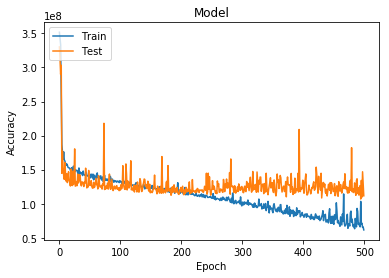

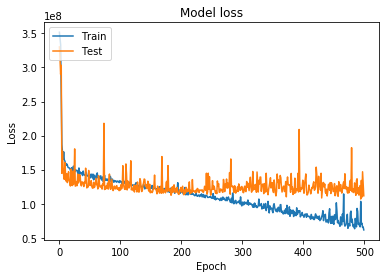

Optimizer: adam, Initializer: uniform, Loss: mean_squared_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               4224      
_________________________________________________________________
elu_26 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_27 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_28 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_34 (De

8415/8415 [==============================] - 2s 237us/step - loss: 7536.7826 - mean_absolute_error: 7536.7826 - val_loss: 7326.8499 - val_mean_absolute_error: 7326.8499
Epoch 81/500
8415/8415 [==============================] - 2s 238us/step - loss: 7539.0795 - mean_absolute_error: 7539.0795 - val_loss: 7267.5895 - val_mean_absolute_error: 7267.5895
Epoch 82/500
8415/8415 [==============================] - 2s 237us/step - loss: 7468.6330 - mean_absolute_error: 7468.6330 - val_loss: 7516.8306 - val_mean_absolute_error: 7516.8306
Epoch 83/500
8415/8415 [==============================] - 2s 238us/step - loss: 7612.1979 - mean_absolute_error: 7612.1979 - val_loss: 7390.9918 - val_mean_absolute_error: 7390.9918
Epoch 84/500
8415/8415 [==============================] - 2s 244us/step - loss: 7527.5335 - mean_absolute_error: 7527.5335 - val_loss: 7314.7585 - val_mean_absolute_error: 7314.7585
Epoch 85/500
8415/8415 [==============================] - 2s 235us/step - loss: 7477.5962 - mean_absolu

Epoch 125/500
8415/8415 [==============================] - 2s 235us/step - loss: 7268.3654 - mean_absolute_error: 7268.3654 - val_loss: 7186.3233 - val_mean_absolute_error: 7186.3233
Epoch 126/500
8415/8415 [==============================] - 2s 237us/step - loss: 7347.0074 - mean_absolute_error: 7347.0074 - val_loss: 7269.5429 - val_mean_absolute_error: 7269.5429
Epoch 127/500
8415/8415 [==============================] - 2s 239us/step - loss: 7239.5728 - mean_absolute_error: 7239.5728 - val_loss: 7204.6393 - val_mean_absolute_error: 7204.6393
Epoch 128/500
8415/8415 [==============================] - 2s 237us/step - loss: 7312.2258 - mean_absolute_error: 7312.2258 - val_loss: 7235.6502 - val_mean_absolute_error: 7235.6502
Epoch 129/500
8415/8415 [==============================] - 2s 244us/step - loss: 7264.0784 - mean_absolute_error: 7264.0784 - val_loss: 7350.2918 - val_mean_absolute_error: 7350.2918
Epoch 130/500
8415/8415 [==============================] - 2s 238us/step - loss: 7343

Epoch 170/500
8415/8415 [==============================] - 2s 238us/step - loss: 7119.9189 - mean_absolute_error: 7119.9189 - val_loss: 7179.2570 - val_mean_absolute_error: 7179.2570
Epoch 171/500
8415/8415 [==============================] - 2s 238us/step - loss: 7084.5957 - mean_absolute_error: 7084.5957 - val_loss: 7369.9499 - val_mean_absolute_error: 7369.9499
Epoch 172/500
8415/8415 [==============================] - 2s 239us/step - loss: 7079.6546 - mean_absolute_error: 7079.6546 - val_loss: 7245.1865 - val_mean_absolute_error: 7245.1865
Epoch 173/500
8415/8415 [==============================] - 2s 243us/step - loss: 7107.6071 - mean_absolute_error: 7107.6071 - val_loss: 7137.1918 - val_mean_absolute_error: 7137.1918
Epoch 174/500
8415/8415 [==============================] - 2s 235us/step - loss: 7131.9611 - mean_absolute_error: 7131.9611 - val_loss: 7501.8197 - val_mean_absolute_error: 7501.8197
Epoch 175/500
8415/8415 [==============================] - 2s 233us/step - loss: 7148

Epoch 215/500
8415/8415 [==============================] - 2s 233us/step - loss: 6966.2803 - mean_absolute_error: 6966.2803 - val_loss: 7114.2981 - val_mean_absolute_error: 7114.2981
Epoch 216/500
8415/8415 [==============================] - 2s 234us/step - loss: 7009.6471 - mean_absolute_error: 7009.6471 - val_loss: 7081.5206 - val_mean_absolute_error: 7081.5206
Epoch 217/500
8415/8415 [==============================] - 2s 237us/step - loss: 6997.3268 - mean_absolute_error: 6997.3268 - val_loss: 7188.5795 - val_mean_absolute_error: 7188.5795
Epoch 218/500
8415/8415 [==============================] - 2s 243us/step - loss: 6908.1263 - mean_absolute_error: 6908.1263 - val_loss: 7105.5843 - val_mean_absolute_error: 7105.5843
Epoch 219/500
8415/8415 [==============================] - 2s 231us/step - loss: 7000.9424 - mean_absolute_error: 7000.9424 - val_loss: 7160.8581 - val_mean_absolute_error: 7160.8581
Epoch 220/500
8415/8415 [==============================] - 2s 237us/step - loss: 6913

Epoch 260/500
8415/8415 [==============================] - 2s 234us/step - loss: 6794.8611 - mean_absolute_error: 6794.8611 - val_loss: 7140.3546 - val_mean_absolute_error: 7140.3546
Epoch 261/500
8415/8415 [==============================] - 2s 242us/step - loss: 6790.1249 - mean_absolute_error: 6790.1249 - val_loss: 6984.7316 - val_mean_absolute_error: 6984.7316
Epoch 262/500
8415/8415 [==============================] - 2s 243us/step - loss: 6756.5603 - mean_absolute_error: 6756.5603 - val_loss: 7167.1840 - val_mean_absolute_error: 7167.1840
Epoch 263/500
8415/8415 [==============================] - 2s 234us/step - loss: 6698.6446 - mean_absolute_error: 6698.6446 - val_loss: 7121.5074 - val_mean_absolute_error: 7121.5074
Epoch 264/500
8415/8415 [==============================] - 2s 230us/step - loss: 6751.6516 - mean_absolute_error: 6751.6516 - val_loss: 7003.6679 - val_mean_absolute_error: 7003.6679
Epoch 265/500
8415/8415 [==============================] - 2s 233us/step - loss: 6746

Epoch 305/500
8415/8415 [==============================] - 2s 239us/step - loss: 6510.1864 - mean_absolute_error: 6510.1864 - val_loss: 6952.6873 - val_mean_absolute_error: 6952.6873
Epoch 306/500
8415/8415 [==============================] - 2s 242us/step - loss: 6474.1812 - mean_absolute_error: 6474.1812 - val_loss: 7228.4429 - val_mean_absolute_error: 7228.4429
Epoch 307/500
8415/8415 [==============================] - 2s 236us/step - loss: 6603.9210 - mean_absolute_error: 6603.9210 - val_loss: 7247.0437 - val_mean_absolute_error: 7247.0437
Epoch 308/500
8415/8415 [==============================] - 2s 237us/step - loss: 6428.4046 - mean_absolute_error: 6428.4046 - val_loss: 7479.1005 - val_mean_absolute_error: 7479.1005
Epoch 309/500
8415/8415 [==============================] - 2s 235us/step - loss: 6508.2470 - mean_absolute_error: 6508.2470 - val_loss: 7086.2794 - val_mean_absolute_error: 7086.2794
Epoch 310/500
8415/8415 [==============================] - 2s 240us/step - loss: 6577

Epoch 350/500
8415/8415 [==============================] - 2s 239us/step - loss: 6253.1207 - mean_absolute_error: 6253.1207 - val_loss: 7115.5830 - val_mean_absolute_error: 7115.5830
Epoch 351/500
8415/8415 [==============================] - 2s 243us/step - loss: 6268.2678 - mean_absolute_error: 6268.2678 - val_loss: 7263.6407 - val_mean_absolute_error: 7263.6407
Epoch 352/500
8415/8415 [==============================] - 2s 251us/step - loss: 6179.4960 - mean_absolute_error: 6179.4960 - val_loss: 7247.5219 - val_mean_absolute_error: 7247.5219
Epoch 353/500
8415/8415 [==============================] - 2s 237us/step - loss: 6162.6398 - mean_absolute_error: 6162.6398 - val_loss: 7591.2916 - val_mean_absolute_error: 7591.2916
Epoch 354/500
8415/8415 [==============================] - 2s 240us/step - loss: 6167.1889 - mean_absolute_error: 6167.1889 - val_loss: 7107.9590 - val_mean_absolute_error: 7107.9590
Epoch 355/500
8415/8415 [==============================] - 2s 240us/step - loss: 6265

Epoch 395/500
8415/8415 [==============================] - 2s 279us/step - loss: 5982.2655 - mean_absolute_error: 5982.2655 - val_loss: 6982.9792 - val_mean_absolute_error: 6982.9792
Epoch 396/500
8415/8415 [==============================] - 2s 258us/step - loss: 5880.7494 - mean_absolute_error: 5880.7494 - val_loss: 7537.7643 - val_mean_absolute_error: 7537.7643
Epoch 397/500
8415/8415 [==============================] - 2s 245us/step - loss: 5914.8349 - mean_absolute_error: 5914.8349 - val_loss: 7103.2312 - val_mean_absolute_error: 7103.2312
Epoch 398/500
8415/8415 [==============================] - 2s 266us/step - loss: 5984.0924 - mean_absolute_error: 5984.0924 - val_loss: 7178.0959 - val_mean_absolute_error: 7178.0959
Epoch 399/500
8415/8415 [==============================] - 2s 270us/step - loss: 5942.6711 - mean_absolute_error: 5942.6711 - val_loss: 7574.2839 - val_mean_absolute_error: 7574.2839
Epoch 400/500
8415/8415 [==============================] - 2s 245us/step - loss: 5842

Epoch 440/500
8415/8415 [==============================] - 2s 236us/step - loss: 5726.4750 - mean_absolute_error: 5726.4750 - val_loss: 7258.5770 - val_mean_absolute_error: 7258.5770
Epoch 441/500
8415/8415 [==============================] - 2s 235us/step - loss: 5631.7216 - mean_absolute_error: 5631.7216 - val_loss: 7347.7084 - val_mean_absolute_error: 7347.7084
Epoch 442/500
8415/8415 [==============================] - 2s 237us/step - loss: 5674.6766 - mean_absolute_error: 5674.6766 - val_loss: 7104.8914 - val_mean_absolute_error: 7104.8914
Epoch 443/500
8415/8415 [==============================] - 2s 240us/step - loss: 5586.6606 - mean_absolute_error: 5586.6606 - val_loss: 7260.1464 - val_mean_absolute_error: 7260.1464
Epoch 444/500
8415/8415 [==============================] - 2s 236us/step - loss: 5696.2310 - mean_absolute_error: 5696.2310 - val_loss: 7141.2019 - val_mean_absolute_error: 7141.2019
Epoch 445/500
8415/8415 [==============================] - 2s 236us/step - loss: 5659

Epoch 485/500
8415/8415 [==============================] - 2s 233us/step - loss: 5344.4243 - mean_absolute_error: 5344.4243 - val_loss: 7387.9360 - val_mean_absolute_error: 7387.9360
Epoch 486/500
8415/8415 [==============================] - 2s 235us/step - loss: 5407.4062 - mean_absolute_error: 5407.4062 - val_loss: 7306.5209 - val_mean_absolute_error: 7306.5209
Epoch 487/500
8415/8415 [==============================] - 2s 238us/step - loss: 5321.4753 - mean_absolute_error: 5321.4753 - val_loss: 7287.4261 - val_mean_absolute_error: 7287.4261
Epoch 488/500
8415/8415 [==============================] - 2s 238us/step - loss: 5364.0623 - mean_absolute_error: 5364.0623 - val_loss: 7298.8667 - val_mean_absolute_error: 7298.8667
Epoch 489/500
8415/8415 [==============================] - 2s 237us/step - loss: 5412.5517 - mean_absolute_error: 5412.5517 - val_loss: 7393.1467 - val_mean_absolute_error: 7393.1467
Epoch 490/500
8415/8415 [==============================] - 2s 239us/step - loss: 5365

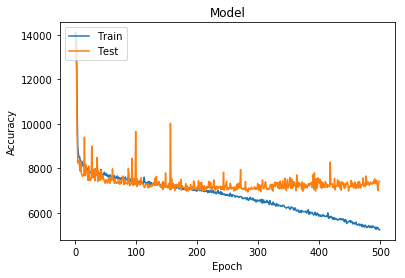

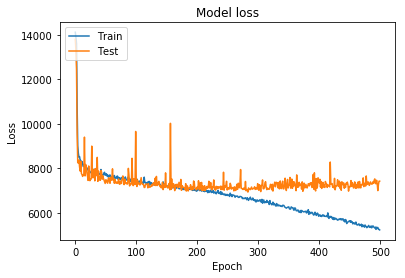

Optimizer: adam, Initializer: uniform, Loss: mean_absolute_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               4224      
_________________________________________________________________
elu_31 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_32 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_33 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_40 (D

Epoch 73/500
8415/8415 [==============================] - 2s 223us/step - loss: 145882535.6435 - mean_squared_error: 145882535.6435 - val_loss: 125167784.8000 - val_mean_squared_error: 125167784.8000
Epoch 74/500
8415/8415 [==============================] - 2s 236us/step - loss: 144300734.3030 - mean_squared_error: 144300734.3030 - val_loss: 147439044.7200 - val_mean_squared_error: 147439044.7200
Epoch 75/500
8415/8415 [==============================] - 2s 223us/step - loss: 144817772.4349 - mean_squared_error: 144817772.4349 - val_loss: 137842012.5600 - val_mean_squared_error: 137842012.5600
Epoch 76/500
8415/8415 [==============================] - 2s 218us/step - loss: 144930126.4278 - mean_squared_error: 144930126.4278 - val_loss: 127359777.4600 - val_mean_squared_error: 127359777.4600
Epoch 77/500
8415/8415 [==============================] - 2s 225us/step - loss: 144036432.1622 - mean_squared_error: 144036432.1622 - val_loss: 129883402.0000 - val_mean_squared_error: 129883402.0000


Epoch 114/500
8415/8415 [==============================] - 2s 230us/step - loss: 138119324.4385 - mean_squared_error: 138119324.4385 - val_loss: 129552531.2000 - val_mean_squared_error: 129552531.2000
Epoch 115/500
8415/8415 [==============================] - 2s 233us/step - loss: 138995745.5365 - mean_squared_error: 138995745.5365 - val_loss: 126750612.1000 - val_mean_squared_error: 126750612.1000
Epoch 116/500
8415/8415 [==============================] - 2s 235us/step - loss: 136858591.0428 - mean_squared_error: 136858591.0428 - val_loss: 173029392.1600 - val_mean_squared_error: 173029392.1600
Epoch 117/500
8415/8415 [==============================] - 2s 219us/step - loss: 140822866.4848 - mean_squared_error: 140822866.4848 - val_loss: 147951469.6800 - val_mean_squared_error: 147951469.6800
Epoch 118/500
8415/8415 [==============================] - 2s 243us/step - loss: 140649980.3333 - mean_squared_error: 140649980.3333 - val_loss: 129018137.6400 - val_mean_squared_error: 129018137.

Epoch 155/500
8415/8415 [==============================] - 2s 228us/step - loss: 135602558.4278 - mean_squared_error: 135602558.4278 - val_loss: 187636272.0800 - val_mean_squared_error: 187636272.0800
Epoch 156/500
8415/8415 [==============================] - 2s 218us/step - loss: 134846582.2424 - mean_squared_error: 134846582.2424 - val_loss: 120263197.1600 - val_mean_squared_error: 120263197.1600
Epoch 157/500
8415/8415 [==============================] - 2s 223us/step - loss: 133886381.5330 - mean_squared_error: 133886381.5330 - val_loss: 133335406.6400 - val_mean_squared_error: 133335406.6400
Epoch 158/500
8415/8415 [==============================] - 2s 225us/step - loss: 134992884.7023 - mean_squared_error: 134992884.7023 - val_loss: 129135687.2000 - val_mean_squared_error: 129135687.2000
Epoch 159/500
8415/8415 [==============================] - 2s 219us/step - loss: 134248651.3084 - mean_squared_error: 134248651.3084 - val_loss: 138591490.4800 - val_mean_squared_error: 138591490.

Epoch 196/500
8415/8415 [==============================] - 2s 217us/step - loss: 130673265.3012 - mean_squared_error: 130673265.3012 - val_loss: 127479772.0000 - val_mean_squared_error: 127479772.0000
Epoch 197/500
8415/8415 [==============================] - 2s 218us/step - loss: 130392599.1159 - mean_squared_error: 130392599.1159 - val_loss: 125240288.1600 - val_mean_squared_error: 125240288.1600
Epoch 198/500
8415/8415 [==============================] - 2s 223us/step - loss: 132661602.2246 - mean_squared_error: 132661602.2246 - val_loss: 128917408.0400 - val_mean_squared_error: 128917408.0400
Epoch 199/500
8415/8415 [==============================] - 2s 220us/step - loss: 132072506.2834 - mean_squared_error: 132072506.2834 - val_loss: 117057869.0000 - val_mean_squared_error: 117057869.0000
Epoch 200/500
8415/8415 [==============================] - 2s 217us/step - loss: 130004199.1301 - mean_squared_error: 130004199.1301 - val_loss: 120595756.0800 - val_mean_squared_error: 120595756.

Epoch 237/500
8415/8415 [==============================] - 2s 221us/step - loss: 128152536.3333 - mean_squared_error: 128152536.3333 - val_loss: 125200992.0800 - val_mean_squared_error: 125200992.0800
Epoch 238/500
8415/8415 [==============================] - 2s 223us/step - loss: 127326086.5223 - mean_squared_error: 127326086.5223 - val_loss: 125233961.1200 - val_mean_squared_error: 125233961.1200
Epoch 239/500
8415/8415 [==============================] - 2s 221us/step - loss: 127102740.1765 - mean_squared_error: 127102740.1765 - val_loss: 140371824.9600 - val_mean_squared_error: 140371824.9600
Epoch 240/500
8415/8415 [==============================] - 2s 224us/step - loss: 127306862.7522 - mean_squared_error: 127306862.7522 - val_loss: 120869897.2000 - val_mean_squared_error: 120869897.2000
Epoch 241/500
8415/8415 [==============================] - 2s 222us/step - loss: 128315518.4260 - mean_squared_error: 128315518.4260 - val_loss: 119536122.6800 - val_mean_squared_error: 119536122.

Epoch 278/500
8415/8415 [==============================] - 2s 232us/step - loss: 126586889.6364 - mean_squared_error: 126586889.6364 - val_loss: 125705969.1800 - val_mean_squared_error: 125705969.1800
Epoch 279/500
8415/8415 [==============================] - 2s 226us/step - loss: 125493704.2834 - mean_squared_error: 125493704.2834 - val_loss: 123956913.4400 - val_mean_squared_error: 123956913.4400
Epoch 280/500
8415/8415 [==============================] - 2s 221us/step - loss: 124839615.6328 - mean_squared_error: 124839615.6328 - val_loss: 117135272.1000 - val_mean_squared_error: 117135272.1000
Epoch 281/500
8415/8415 [==============================] - 2s 225us/step - loss: 125551225.4474 - mean_squared_error: 125551225.4474 - val_loss: 124342084.8400 - val_mean_squared_error: 124342084.8400
Epoch 282/500
8415/8415 [==============================] - 2s 224us/step - loss: 125887233.3333 - mean_squared_error: 125887233.3333 - val_loss: 139782168.1600 - val_mean_squared_error: 139782168.

Epoch 319/500
8415/8415 [==============================] - 2s 224us/step - loss: 123965930.3850 - mean_squared_error: 123965930.3850 - val_loss: 116739714.3400 - val_mean_squared_error: 116739714.3400
Epoch 320/500
8415/8415 [==============================] - 2s 224us/step - loss: 123291603.7487 - mean_squared_error: 123291603.7487 - val_loss: 126329576.4400 - val_mean_squared_error: 126329576.4400
Epoch 321/500
8415/8415 [==============================] - 2s 220us/step - loss: 122891626.0963 - mean_squared_error: 122891626.0963 - val_loss: 122243305.5000 - val_mean_squared_error: 122243305.5000
Epoch 322/500
8415/8415 [==============================] - 2s 224us/step - loss: 123425660.4278 - mean_squared_error: 123425660.4278 - val_loss: 116291021.0400 - val_mean_squared_error: 116291021.0400
Epoch 323/500
8415/8415 [==============================] - 2s 220us/step - loss: 122933573.2888 - mean_squared_error: 122933573.2888 - val_loss: 117542172.9800 - val_mean_squared_error: 117542172.

Epoch 360/500
8415/8415 [==============================] - 2s 221us/step - loss: 120865760.5312 - mean_squared_error: 120865760.5312 - val_loss: 115393368.9000 - val_mean_squared_error: 115393368.9000
Epoch 361/500
8415/8415 [==============================] - 2s 221us/step - loss: 122214360.7772 - mean_squared_error: 122214360.7772 - val_loss: 120959902.5400 - val_mean_squared_error: 120959902.5400
Epoch 362/500
8415/8415 [==============================] - 2s 229us/step - loss: 121524917.3654 - mean_squared_error: 121524917.3654 - val_loss: 127220660.3200 - val_mean_squared_error: 127220660.3200
Epoch 363/500
8415/8415 [==============================] - 2s 220us/step - loss: 120704846.9626 - mean_squared_error: 120704846.9626 - val_loss: 117117731.5400 - val_mean_squared_error: 117117731.5400
Epoch 364/500
8415/8415 [==============================] - 2s 221us/step - loss: 121718436.7112 - mean_squared_error: 121718436.7112 - val_loss: 121400813.2400 - val_mean_squared_error: 121400813.

Epoch 401/500
8415/8415 [==============================] - 2s 223us/step - loss: 121488979.6756 - mean_squared_error: 121488979.6756 - val_loss: 113677074.4200 - val_mean_squared_error: 113677074.4200
Epoch 402/500
8415/8415 [==============================] - 2s 221us/step - loss: 119527555.8717 - mean_squared_error: 119527555.8717 - val_loss: 116383768.6400 - val_mean_squared_error: 116383768.6400
Epoch 403/500
8415/8415 [==============================] - 2s 224us/step - loss: 120603709.0000 - mean_squared_error: 120603709.0000 - val_loss: 118369994.4800 - val_mean_squared_error: 118369994.4800
Epoch 404/500
8415/8415 [==============================] - 2s 221us/step - loss: 119368806.2014 - mean_squared_error: 119368806.2014 - val_loss: 114644127.1000 - val_mean_squared_error: 114644127.1000
Epoch 405/500
8415/8415 [==============================] - 2s 226us/step - loss: 121312659.7932 - mean_squared_error: 121312659.7932 - val_loss: 123855694.3200 - val_mean_squared_error: 123855694.

Epoch 442/500
8415/8415 [==============================] - 2s 219us/step - loss: 117740062.7219 - mean_squared_error: 117740062.7219 - val_loss: 117975484.0000 - val_mean_squared_error: 117975484.0000
Epoch 443/500
8415/8415 [==============================] - 2s 224us/step - loss: 117310296.6168 - mean_squared_error: 117310296.6168 - val_loss: 136599690.8500 - val_mean_squared_error: 136599690.8500
Epoch 444/500
8415/8415 [==============================] - 2s 221us/step - loss: 117254772.1604 - mean_squared_error: 117254772.1604 - val_loss: 116477358.9200 - val_mean_squared_error: 116477358.9200
Epoch 445/500
8415/8415 [==============================] - 2s 217us/step - loss: 117342497.8645 - mean_squared_error: 117342497.8645 - val_loss: 117084135.1800 - val_mean_squared_error: 117084135.1800
Epoch 446/500
8415/8415 [==============================] - 2s 224us/step - loss: 117035538.8414 - mean_squared_error: 117035538.8414 - val_loss: 115786889.9800 - val_mean_squared_error: 115786889.

Epoch 483/500
8415/8415 [==============================] - 2s 222us/step - loss: 114018572.3494 - mean_squared_error: 114018572.3494 - val_loss: 118652965.4400 - val_mean_squared_error: 118652965.4400
Epoch 484/500
8415/8415 [==============================] - 2s 224us/step - loss: 112686142.3030 - mean_squared_error: 112686142.3030 - val_loss: 117363766.1000 - val_mean_squared_error: 117363766.1000
Epoch 485/500
8415/8415 [==============================] - 2s 221us/step - loss: 114624724.8093 - mean_squared_error: 114624724.8093 - val_loss: 118250371.7800 - val_mean_squared_error: 118250371.7800
Epoch 486/500
8415/8415 [==============================] - 2s 222us/step - loss: 115266290.9661 - mean_squared_error: 115266290.9661 - val_loss: 114506313.0800 - val_mean_squared_error: 114506313.0800
Epoch 487/500
8415/8415 [==============================] - 2s 218us/step - loss: 112833708.2246 - mean_squared_error: 112833708.2246 - val_loss: 127642642.4000 - val_mean_squared_error: 127642642.

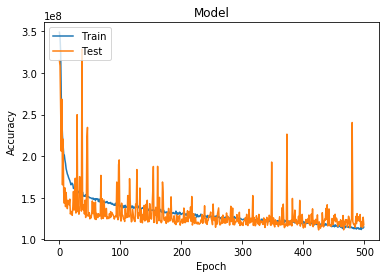

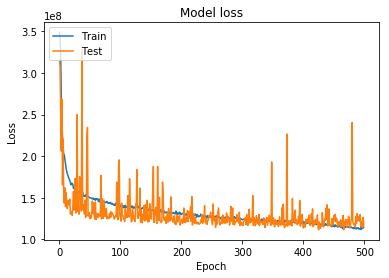

Optimizer: rmsprop, Initializer: glorot_uniform, Loss: mean_squared_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               4224      
_________________________________________________________________
elu_36 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_37 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_38 (ELU)                 (None, 128)               0         
_________________________________________________________________
de

8415/8415 [==============================] - 2s 222us/step - loss: 7632.2712 - mean_absolute_error: 7632.2712 - val_loss: 7305.5392 - val_mean_absolute_error: 7305.5392
Epoch 81/500
8415/8415 [==============================] - 2s 226us/step - loss: 7586.3083 - mean_absolute_error: 7586.3083 - val_loss: 7380.8093 - val_mean_absolute_error: 7380.8093
Epoch 82/500
8415/8415 [==============================] - 2s 237us/step - loss: 7608.7424 - mean_absolute_error: 7608.7424 - val_loss: 7567.6170 - val_mean_absolute_error: 7567.6170
Epoch 83/500
8415/8415 [==============================] - 2s 222us/step - loss: 7626.7785 - mean_absolute_error: 7626.7785 - val_loss: 7346.1098 - val_mean_absolute_error: 7346.1098
Epoch 84/500
8415/8415 [==============================] - 2s 225us/step - loss: 7652.4270 - mean_absolute_error: 7652.4270 - val_loss: 7467.5688 - val_mean_absolute_error: 7467.5688
Epoch 85/500
8415/8415 [==============================] - 2s 225us/step - loss: 7625.2637 - mean_absolu

Epoch 125/500
8415/8415 [==============================] - 2s 220us/step - loss: 7408.0141 - mean_absolute_error: 7408.0141 - val_loss: 7705.2769 - val_mean_absolute_error: 7705.2769
Epoch 126/500
8415/8415 [==============================] - 2s 218us/step - loss: 7437.5245 - mean_absolute_error: 7437.5245 - val_loss: 7384.0309 - val_mean_absolute_error: 7384.0309
Epoch 127/500
8415/8415 [==============================] - 2s 222us/step - loss: 7400.0905 - mean_absolute_error: 7400.0905 - val_loss: 7876.7793 - val_mean_absolute_error: 7876.7793
Epoch 128/500
8415/8415 [==============================] - 2s 224us/step - loss: 7412.7709 - mean_absolute_error: 7412.7709 - val_loss: 7428.7788 - val_mean_absolute_error: 7428.7788
Epoch 129/500
8415/8415 [==============================] - 2s 230us/step - loss: 7399.9216 - mean_absolute_error: 7399.9216 - val_loss: 7293.8996 - val_mean_absolute_error: 7293.8996
Epoch 130/500
8415/8415 [==============================] - 2s 221us/step - loss: 7399

Epoch 170/500
8415/8415 [==============================] - 2s 220us/step - loss: 7297.3001 - mean_absolute_error: 7297.3001 - val_loss: 7978.6320 - val_mean_absolute_error: 7978.6320
Epoch 171/500
8415/8415 [==============================] - 2s 221us/step - loss: 7262.2676 - mean_absolute_error: 7262.2676 - val_loss: 7409.1481 - val_mean_absolute_error: 7409.1481
Epoch 172/500
8415/8415 [==============================] - 2s 222us/step - loss: 7225.8540 - mean_absolute_error: 7225.8540 - val_loss: 7358.7864 - val_mean_absolute_error: 7358.7864
Epoch 173/500
8415/8415 [==============================] - 2s 221us/step - loss: 7262.0591 - mean_absolute_error: 7262.0591 - val_loss: 7522.2752 - val_mean_absolute_error: 7522.2752
Epoch 174/500
8415/8415 [==============================] - 2s 218us/step - loss: 7236.3199 - mean_absolute_error: 7236.3199 - val_loss: 7151.2769 - val_mean_absolute_error: 7151.2769
Epoch 175/500
8415/8415 [==============================] - 2s 220us/step - loss: 7206

Epoch 215/500
8415/8415 [==============================] - 2s 215us/step - loss: 7112.9641 - mean_absolute_error: 7112.9641 - val_loss: 7156.5881 - val_mean_absolute_error: 7156.5881
Epoch 216/500
8415/8415 [==============================] - 2s 217us/step - loss: 7092.3267 - mean_absolute_error: 7092.3267 - val_loss: 7403.7009 - val_mean_absolute_error: 7403.7009
Epoch 217/500
8415/8415 [==============================] - 2s 221us/step - loss: 7129.4625 - mean_absolute_error: 7129.4625 - val_loss: 7140.4688 - val_mean_absolute_error: 7140.4688
Epoch 218/500
8415/8415 [==============================] - 2s 220us/step - loss: 7128.8376 - mean_absolute_error: 7128.8376 - val_loss: 7187.0888 - val_mean_absolute_error: 7187.0888
Epoch 219/500
8415/8415 [==============================] - 2s 221us/step - loss: 7146.2475 - mean_absolute_error: 7146.2475 - val_loss: 7229.9159 - val_mean_absolute_error: 7229.9159
Epoch 220/500
8415/8415 [==============================] - 2s 218us/step - loss: 7066

Epoch 260/500
8415/8415 [==============================] - 2s 217us/step - loss: 6943.3760 - mean_absolute_error: 6943.3760 - val_loss: 7165.9157 - val_mean_absolute_error: 7165.9157
Epoch 261/500
8415/8415 [==============================] - 2s 222us/step - loss: 6941.9636 - mean_absolute_error: 6941.9636 - val_loss: 7154.6463 - val_mean_absolute_error: 7154.6463
Epoch 262/500
8415/8415 [==============================] - 2s 221us/step - loss: 6932.5462 - mean_absolute_error: 6932.5462 - val_loss: 7151.7050 - val_mean_absolute_error: 7151.7050
Epoch 263/500
8415/8415 [==============================] - 2s 221us/step - loss: 6958.1118 - mean_absolute_error: 6958.1118 - val_loss: 7061.2473 - val_mean_absolute_error: 7061.2473
Epoch 264/500
8415/8415 [==============================] - 2s 218us/step - loss: 6942.0774 - mean_absolute_error: 6942.0774 - val_loss: 7085.7487 - val_mean_absolute_error: 7085.7487
Epoch 265/500
8415/8415 [==============================] - 2s 219us/step - loss: 6913

Epoch 305/500
8415/8415 [==============================] - 2s 229us/step - loss: 6789.3815 - mean_absolute_error: 6789.3815 - val_loss: 7274.1668 - val_mean_absolute_error: 7274.1668
Epoch 306/500
8415/8415 [==============================] - 2s 226us/step - loss: 6772.2430 - mean_absolute_error: 6772.2430 - val_loss: 6970.8894 - val_mean_absolute_error: 6970.8894
Epoch 307/500
8415/8415 [==============================] - 2s 221us/step - loss: 6775.4284 - mean_absolute_error: 6775.4284 - val_loss: 7079.1259 - val_mean_absolute_error: 7079.1259
Epoch 308/500
8415/8415 [==============================] - 2s 220us/step - loss: 6734.0303 - mean_absolute_error: 6734.0303 - val_loss: 7246.9882 - val_mean_absolute_error: 7246.9882
Epoch 309/500
8415/8415 [==============================] - 2s 222us/step - loss: 6782.2726 - mean_absolute_error: 6782.2726 - val_loss: 7126.8689 - val_mean_absolute_error: 7126.8689
Epoch 310/500
8415/8415 [==============================] - 2s 225us/step - loss: 6770

Epoch 350/500
8415/8415 [==============================] - 2s 232us/step - loss: 6662.4031 - mean_absolute_error: 6662.4031 - val_loss: 6957.6882 - val_mean_absolute_error: 6957.6882
Epoch 351/500
8415/8415 [==============================] - 2s 245us/step - loss: 6603.6856 - mean_absolute_error: 6603.6856 - val_loss: 7047.4492 - val_mean_absolute_error: 7047.4492
Epoch 352/500
8415/8415 [==============================] - 2s 235us/step - loss: 6598.9946 - mean_absolute_error: 6598.9946 - val_loss: 7029.3716 - val_mean_absolute_error: 7029.3716
Epoch 353/500
8415/8415 [==============================] - 2s 226us/step - loss: 6597.5970 - mean_absolute_error: 6597.5970 - val_loss: 7303.5346 - val_mean_absolute_error: 7303.5346
Epoch 354/500
8415/8415 [==============================] - 2s 222us/step - loss: 6589.7437 - mean_absolute_error: 6589.7437 - val_loss: 6902.7393 - val_mean_absolute_error: 6902.7393
Epoch 355/500
8415/8415 [==============================] - 2s 226us/step - loss: 6606

Epoch 395/500
8415/8415 [==============================] - 2s 239us/step - loss: 6483.3914 - mean_absolute_error: 6483.3914 - val_loss: 7578.8033 - val_mean_absolute_error: 7578.8033
Epoch 396/500
8415/8415 [==============================] - 2s 259us/step - loss: 6409.9020 - mean_absolute_error: 6409.9020 - val_loss: 7054.6935 - val_mean_absolute_error: 7054.6935
Epoch 397/500
8415/8415 [==============================] - 2s 251us/step - loss: 6401.3680 - mean_absolute_error: 6401.3680 - val_loss: 7094.3040 - val_mean_absolute_error: 7094.3040
Epoch 398/500
8415/8415 [==============================] - 2s 242us/step - loss: 6442.2050 - mean_absolute_error: 6442.2050 - val_loss: 7057.3761 - val_mean_absolute_error: 7057.3761
Epoch 399/500
8415/8415 [==============================] - 2s 243us/step - loss: 6463.7789 - mean_absolute_error: 6463.7789 - val_loss: 7494.7676 - val_mean_absolute_error: 7494.7676
Epoch 400/500
8415/8415 [==============================] - 2s 238us/step - loss: 6450

Epoch 440/500
8415/8415 [==============================] - 2s 255us/step - loss: 6287.3705 - mean_absolute_error: 6287.3705 - val_loss: 7554.0071 - val_mean_absolute_error: 7554.0071
Epoch 441/500
8415/8415 [==============================] - 2s 256us/step - loss: 6264.9360 - mean_absolute_error: 6264.9360 - val_loss: 7072.1327 - val_mean_absolute_error: 7072.1327
Epoch 442/500
8415/8415 [==============================] - 2s 258us/step - loss: 6220.1923 - mean_absolute_error: 6220.1923 - val_loss: 7032.6618 - val_mean_absolute_error: 7032.6618
Epoch 443/500
8415/8415 [==============================] - 2s 256us/step - loss: 6262.7610 - mean_absolute_error: 6262.7610 - val_loss: 7084.9956 - val_mean_absolute_error: 7084.9956
Epoch 444/500
8415/8415 [==============================] - 2s 238us/step - loss: 6250.1023 - mean_absolute_error: 6250.1023 - val_loss: 7281.8192 - val_mean_absolute_error: 7281.8192
Epoch 445/500
8415/8415 [==============================] - 2s 235us/step - loss: 6204

Epoch 485/500
8415/8415 [==============================] - 3s 301us/step - loss: 6119.8028 - mean_absolute_error: 6119.8028 - val_loss: 7270.6811 - val_mean_absolute_error: 7270.6811
Epoch 486/500
8415/8415 [==============================] - 2s 290us/step - loss: 6126.0073 - mean_absolute_error: 6126.0073 - val_loss: 7049.7360 - val_mean_absolute_error: 7049.7360
Epoch 487/500
8415/8415 [==============================] - 2s 262us/step - loss: 6052.2791 - mean_absolute_error: 6052.2791 - val_loss: 7094.3336 - val_mean_absolute_error: 7094.3336
Epoch 488/500
8415/8415 [==============================] - 2s 258us/step - loss: 6056.9157 - mean_absolute_error: 6056.9157 - val_loss: 7210.7743 - val_mean_absolute_error: 7210.7743
Epoch 489/500
8415/8415 [==============================] - 2s 258us/step - loss: 6106.3336 - mean_absolute_error: 6106.3336 - val_loss: 6932.5813 - val_mean_absolute_error: 6932.5813
Epoch 490/500
8415/8415 [==============================] - 2s 257us/step - loss: 6025

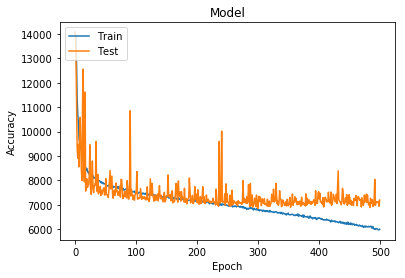

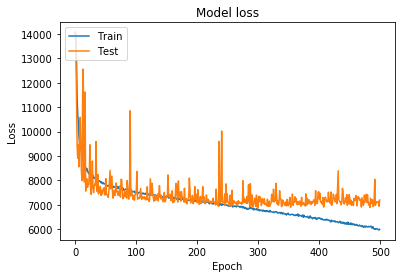

Optimizer: rmsprop, Initializer: glorot_uniform, Loss: mean_absolute_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               4224      
_________________________________________________________________
elu_41 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_42 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_43 (ELU)                 (None, 128)               0         
_________________________________________________________________
d

8415/8415 [==============================] - 2s 229us/step - loss: 146293476.3815 - mean_squared_error: 146293476.3815 - val_loss: 159158341.3600 - val_mean_squared_error: 159158341.3600
Epoch 74/500
8415/8415 [==============================] - 2s 235us/step - loss: 145834554.9269 - mean_squared_error: 145834554.9269 - val_loss: 180345723.4400 - val_mean_squared_error: 180345723.4400
Epoch 75/500
8415/8415 [==============================] - 2s 229us/step - loss: 146904909.7255 - mean_squared_error: 146904909.7255 - val_loss: 126429210.2400 - val_mean_squared_error: 126429210.2400
Epoch 76/500
8415/8415 [==============================] - 2s 231us/step - loss: 147046593.6756 - mean_squared_error: 147046593.6756 - val_loss: 126305600.0000 - val_mean_squared_error: 126305600.0000
Epoch 77/500
8415/8415 [==============================] - 2s 227us/step - loss: 144989795.4902 - mean_squared_error: 144989795.4902 - val_loss: 126413974.8400 - val_mean_squared_error: 126413974.8400
Epoch 78/500


Epoch 114/500
8415/8415 [==============================] - 2s 242us/step - loss: 141509904.7701 - mean_squared_error: 141509904.7701 - val_loss: 126567135.0600 - val_mean_squared_error: 126567135.0600
Epoch 115/500
8415/8415 [==============================] - 2s 216us/step - loss: 141076512.2032 - mean_squared_error: 141076512.2032 - val_loss: 127690880.2400 - val_mean_squared_error: 127690880.2400
Epoch 116/500
8415/8415 [==============================] - 2s 219us/step - loss: 141498267.4938 - mean_squared_error: 141498267.4938 - val_loss: 138187755.8400 - val_mean_squared_error: 138187755.8400
Epoch 117/500
8415/8415 [==============================] - 2s 230us/step - loss: 140789746.1854 - mean_squared_error: 140789746.1854 - val_loss: 168058110.6000 - val_mean_squared_error: 168058110.6000
Epoch 118/500
8415/8415 [==============================] - 2s 222us/step - loss: 141534212.5775 - mean_squared_error: 141534212.5775 - val_loss: 122011144.2600 - val_mean_squared_error: 122011144.

Epoch 155/500
8415/8415 [==============================] - 2s 239us/step - loss: 136140043.2977 - mean_squared_error: 136140043.2977 - val_loss: 121640853.9600 - val_mean_squared_error: 121640853.9600
Epoch 156/500
8415/8415 [==============================] - 2s 226us/step - loss: 136253986.4171 - mean_squared_error: 136253986.4171 - val_loss: 124955039.1600 - val_mean_squared_error: 124955039.1600
Epoch 157/500
8415/8415 [==============================] - 2s 224us/step - loss: 136118817.3957 - mean_squared_error: 136118817.3957 - val_loss: 119486422.5600 - val_mean_squared_error: 119486422.5600
Epoch 158/500
8415/8415 [==============================] - 2s 222us/step - loss: 134935171.8503 - mean_squared_error: 134935171.8503 - val_loss: 128947943.5900 - val_mean_squared_error: 128947943.5900
Epoch 159/500
8415/8415 [==============================] - 2s 231us/step - loss: 135488487.4189 - mean_squared_error: 135488487.4189 - val_loss: 136713863.7400 - val_mean_squared_error: 136713863.

Epoch 196/500
8415/8415 [==============================] - 2s 224us/step - loss: 129212750.5437 - mean_squared_error: 129212750.5437 - val_loss: 125934673.7800 - val_mean_squared_error: 125934673.7800
Epoch 197/500
8415/8415 [==============================] - 2s 230us/step - loss: 130760901.3333 - mean_squared_error: 130760901.3333 - val_loss: 122191816.3800 - val_mean_squared_error: 122191816.3800
Epoch 198/500
8415/8415 [==============================] - 2s 233us/step - loss: 129730785.6078 - mean_squared_error: 129730785.6078 - val_loss: 119554546.9000 - val_mean_squared_error: 119554546.9000
Epoch 199/500
8415/8415 [==============================] - 2s 226us/step - loss: 131277003.9376 - mean_squared_error: 131277003.9376 - val_loss: 117397796.3200 - val_mean_squared_error: 117397796.3200
Epoch 200/500
8415/8415 [==============================] - 2s 227us/step - loss: 129985531.6381 - mean_squared_error: 129985531.6381 - val_loss: 117565478.1400 - val_mean_squared_error: 117565478.

Epoch 237/500
8415/8415 [==============================] - 2s 227us/step - loss: 130452097.8859 - mean_squared_error: 130452097.8859 - val_loss: 126061752.4400 - val_mean_squared_error: 126061752.4400
Epoch 238/500
8415/8415 [==============================] - 2s 224us/step - loss: 129212353.7576 - mean_squared_error: 129212353.7576 - val_loss: 122318876.9200 - val_mean_squared_error: 122318876.9200
Epoch 239/500
8415/8415 [==============================] - 2s 224us/step - loss: 129213123.8788 - mean_squared_error: 129213123.8788 - val_loss: 122181215.0000 - val_mean_squared_error: 122181215.0000
Epoch 240/500
8415/8415 [==============================] - 2s 218us/step - loss: 130568874.7326 - mean_squared_error: 130568874.7326 - val_loss: 117975568.4200 - val_mean_squared_error: 117975568.4200
Epoch 241/500
8415/8415 [==============================] - 2s 224us/step - loss: 128307407.8360 - mean_squared_error: 128307407.8360 - val_loss: 121692373.9000 - val_mean_squared_error: 121692373.

Epoch 278/500
8415/8415 [==============================] - 2s 225us/step - loss: 124502323.5455 - mean_squared_error: 124502323.5455 - val_loss: 121169701.0000 - val_mean_squared_error: 121169701.0000
Epoch 279/500
8415/8415 [==============================] - 2s 220us/step - loss: 124993080.8271 - mean_squared_error: 124993080.8271 - val_loss: 118532307.7600 - val_mean_squared_error: 118532307.7600
Epoch 280/500
8415/8415 [==============================] - 2s 221us/step - loss: 125893636.1533 - mean_squared_error: 125893636.1533 - val_loss: 116490556.8200 - val_mean_squared_error: 116490556.8200
Epoch 281/500
8415/8415 [==============================] - 2s 227us/step - loss: 125521138.0276 - mean_squared_error: 125521138.0276 - val_loss: 139882651.5400 - val_mean_squared_error: 139882651.5400
Epoch 282/500
8415/8415 [==============================] - 2s 223us/step - loss: 125777914.5294 - mean_squared_error: 125777914.5294 - val_loss: 119780616.0800 - val_mean_squared_error: 119780616.

Epoch 319/500
8415/8415 [==============================] - 2s 226us/step - loss: 124438192.9340 - mean_squared_error: 124438192.9340 - val_loss: 120369170.0600 - val_mean_squared_error: 120369170.0600
Epoch 320/500
8415/8415 [==============================] - 2s 220us/step - loss: 122823450.0303 - mean_squared_error: 122823450.0303 - val_loss: 117450456.5800 - val_mean_squared_error: 117450456.5800
Epoch 321/500
8415/8415 [==============================] - 2s 220us/step - loss: 124183215.0695 - mean_squared_error: 124183215.0695 - val_loss: 122160033.6000 - val_mean_squared_error: 122160033.6000
Epoch 322/500
8415/8415 [==============================] - 2s 225us/step - loss: 121892553.6114 - mean_squared_error: 121892553.6114 - val_loss: 124637658.0800 - val_mean_squared_error: 124637658.0800
Epoch 323/500
8415/8415 [==============================] - 2s 224us/step - loss: 122985050.0695 - mean_squared_error: 122985050.0695 - val_loss: 118994663.3000 - val_mean_squared_error: 118994663.

Epoch 360/500
8415/8415 [==============================] - 2s 224us/step - loss: 120925765.9929 - mean_squared_error: 120925765.9929 - val_loss: 119565802.9600 - val_mean_squared_error: 119565802.9600
Epoch 361/500
8415/8415 [==============================] - 2s 223us/step - loss: 121084882.4474 - mean_squared_error: 121084882.4474 - val_loss: 119966525.7600 - val_mean_squared_error: 119966525.7600
Epoch 362/500
8415/8415 [==============================] - 2s 222us/step - loss: 120251930.8503 - mean_squared_error: 120251930.8503 - val_loss: 119810482.3600 - val_mean_squared_error: 119810482.3600
Epoch 363/500
8415/8415 [==============================] - 2s 225us/step - loss: 119234113.7665 - mean_squared_error: 119234113.7665 - val_loss: 121725750.8600 - val_mean_squared_error: 121725750.8600
Epoch 364/500
8415/8415 [==============================] - 2s 221us/step - loss: 120488707.7932 - mean_squared_error: 120488707.7932 - val_loss: 130842200.4800 - val_mean_squared_error: 130842200.

Epoch 401/500
8415/8415 [==============================] - 2s 220us/step - loss: 117484657.0232 - mean_squared_error: 117484657.0232 - val_loss: 116069431.8800 - val_mean_squared_error: 116069431.8800
Epoch 402/500
8415/8415 [==============================] - 2s 222us/step - loss: 118110983.9037 - mean_squared_error: 118110983.9037 - val_loss: 116948314.2400 - val_mean_squared_error: 116948314.2400
Epoch 403/500
8415/8415 [==============================] - 2s 216us/step - loss: 119994224.5455 - mean_squared_error: 119994224.5455 - val_loss: 115514647.8800 - val_mean_squared_error: 115514647.8800
Epoch 404/500
8415/8415 [==============================] - 2s 218us/step - loss: 120833891.3850 - mean_squared_error: 120833891.3850 - val_loss: 119610752.5200 - val_mean_squared_error: 119610752.5200
Epoch 405/500
8415/8415 [==============================] - 2s 227us/step - loss: 119110245.5330 - mean_squared_error: 119110245.5330 - val_loss: 125244133.9600 - val_mean_squared_error: 125244133.

Epoch 442/500
8415/8415 [==============================] - 2s 224us/step - loss: 115697908.9483 - mean_squared_error: 115697908.9483 - val_loss: 119975971.2000 - val_mean_squared_error: 119975971.2000
Epoch 443/500
8415/8415 [==============================] - 2s 223us/step - loss: 115867245.4795 - mean_squared_error: 115867245.4795 - val_loss: 115569913.9400 - val_mean_squared_error: 115569913.9400
Epoch 444/500
8415/8415 [==============================] - 2s 224us/step - loss: 117188849.3761 - mean_squared_error: 117188849.3761 - val_loss: 119735746.9800 - val_mean_squared_error: 119735746.9800
Epoch 445/500
8415/8415 [==============================] - 2s 227us/step - loss: 116401111.3672 - mean_squared_error: 116401111.3672 - val_loss: 117183887.1600 - val_mean_squared_error: 117183887.1600
Epoch 446/500
8415/8415 [==============================] - 2s 218us/step - loss: 114610128.8627 - mean_squared_error: 114610128.8627 - val_loss: 114845124.8200 - val_mean_squared_error: 114845124.

Epoch 483/500
8415/8415 [==============================] - 2s 264us/step - loss: 114408406.8699 - mean_squared_error: 114408406.8699 - val_loss: 117838368.8000 - val_mean_squared_error: 117838368.8000
Epoch 484/500
8415/8415 [==============================] - 2s 225us/step - loss: 113854287.6845 - mean_squared_error: 113854287.6845 - val_loss: 120505884.8000 - val_mean_squared_error: 120505884.8000
Epoch 485/500
8415/8415 [==============================] - 2s 227us/step - loss: 115659137.8146 - mean_squared_error: 115659137.8146 - val_loss: 126847397.2400 - val_mean_squared_error: 126847397.2400
Epoch 486/500
8415/8415 [==============================] - 2s 219us/step - loss: 115376250.2050 - mean_squared_error: 115376250.2050 - val_loss: 113718108.7800 - val_mean_squared_error: 113718108.7800
Epoch 487/500
8415/8415 [==============================] - 2s 235us/step - loss: 114241704.6631 - mean_squared_error: 114241704.6631 - val_loss: 115172941.3200 - val_mean_squared_error: 115172941.

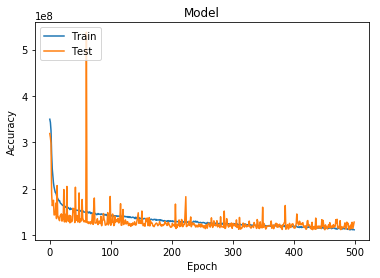

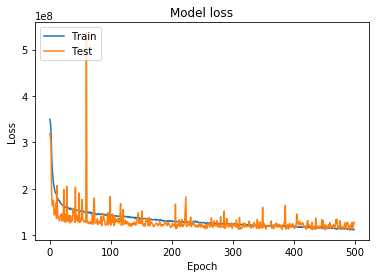

Optimizer: rmsprop, Initializer: normal, Loss: mean_squared_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 128)               4224      
_________________________________________________________________
elu_46 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_47 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_48 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_58 (

8415/8415 [==============================] - 2s 225us/step - loss: 7674.1680 - mean_absolute_error: 7674.1680 - val_loss: 7358.7042 - val_mean_absolute_error: 7358.7042
Epoch 81/500
8415/8415 [==============================] - 2s 222us/step - loss: 7682.7627 - mean_absolute_error: 7682.7627 - val_loss: 7444.3488 - val_mean_absolute_error: 7444.3488
Epoch 82/500
8415/8415 [==============================] - 2s 230us/step - loss: 7719.5319 - mean_absolute_error: 7719.5319 - val_loss: 7602.4003 - val_mean_absolute_error: 7602.4003
Epoch 83/500
8415/8415 [==============================] - 2s 221us/step - loss: 7641.1523 - mean_absolute_error: 7641.1523 - val_loss: 7466.4552 - val_mean_absolute_error: 7466.4552
Epoch 84/500
8415/8415 [==============================] - 2s 224us/step - loss: 7599.6556 - mean_absolute_error: 7599.6556 - val_loss: 7611.8770 - val_mean_absolute_error: 7611.8770
Epoch 85/500
8415/8415 [==============================] - 2s 220us/step - loss: 7660.0861 - mean_absolu

Epoch 125/500
8415/8415 [==============================] - 2s 217us/step - loss: 7482.2433 - mean_absolute_error: 7482.2433 - val_loss: 7229.5759 - val_mean_absolute_error: 7229.5759
Epoch 126/500
8415/8415 [==============================] - 2s 220us/step - loss: 7446.9972 - mean_absolute_error: 7446.9972 - val_loss: 7289.3202 - val_mean_absolute_error: 7289.3202
Epoch 127/500
8415/8415 [==============================] - 2s 223us/step - loss: 7433.9090 - mean_absolute_error: 7433.9090 - val_loss: 7268.7439 - val_mean_absolute_error: 7268.7439
Epoch 128/500
8415/8415 [==============================] - 2s 223us/step - loss: 7460.3407 - mean_absolute_error: 7460.3407 - val_loss: 7337.7651 - val_mean_absolute_error: 7337.7651
Epoch 129/500
8415/8415 [==============================] - 2s 229us/step - loss: 7490.6254 - mean_absolute_error: 7490.6254 - val_loss: 7201.1700 - val_mean_absolute_error: 7201.1700
Epoch 130/500
8415/8415 [==============================] - ETA: 0s - loss: 7448.6648 

Epoch 214/500
8415/8415 [==============================] - 2s 224us/step - loss: 7202.6308 - mean_absolute_error: 7202.6308 - val_loss: 7157.1965 - val_mean_absolute_error: 7157.1965
Epoch 215/500
8415/8415 [==============================] - 2s 223us/step - loss: 7167.3550 - mean_absolute_error: 7167.3550 - val_loss: 7253.6945 - val_mean_absolute_error: 7253.6945
Epoch 216/500
8415/8415 [==============================] - 2s 219us/step - loss: 7207.6421 - mean_absolute_error: 7207.6421 - val_loss: 7323.1752 - val_mean_absolute_error: 7323.1752
Epoch 217/500
8415/8415 [==============================] - 2s 219us/step - loss: 7219.3666 - mean_absolute_error: 7219.3666 - val_loss: 7272.2054 - val_mean_absolute_error: 7272.2054
Epoch 218/500
8415/8415 [==============================] - 2s 230us/step - loss: 7203.1238 - mean_absolute_error: 7203.1238 - val_loss: 8063.5541 - val_mean_absolute_error: 8063.5541
Epoch 219/500
8415/8415 [==============================] - 2s 220us/step - loss: 7174

Epoch 259/500
8415/8415 [==============================] - 2s 225us/step - loss: 7056.8316 - mean_absolute_error: 7056.8316 - val_loss: 7067.7495 - val_mean_absolute_error: 7067.7495
Epoch 260/500
8415/8415 [==============================] - 2s 223us/step - loss: 7018.9417 - mean_absolute_error: 7018.9417 - val_loss: 7222.8816 - val_mean_absolute_error: 7222.8816
Epoch 261/500
8415/8415 [==============================] - 2s 226us/step - loss: 7056.5469 - mean_absolute_error: 7056.5469 - val_loss: 6997.9381 - val_mean_absolute_error: 6997.9381
Epoch 262/500
8415/8415 [==============================] - 2s 225us/step - loss: 7068.7347 - mean_absolute_error: 7068.7347 - val_loss: 7203.2292 - val_mean_absolute_error: 7203.2292
Epoch 263/500
8415/8415 [==============================] - 2s 218us/step - loss: 7063.3556 - mean_absolute_error: 7063.3556 - val_loss: 7048.1114 - val_mean_absolute_error: 7048.1114
Epoch 264/500
8415/8415 [==============================] - 2s 221us/step - loss: 7024

Epoch 304/500
8415/8415 [==============================] - 2s 222us/step - loss: 6913.0133 - mean_absolute_error: 6913.0133 - val_loss: 7070.9911 - val_mean_absolute_error: 7070.9911
Epoch 305/500
8415/8415 [==============================] - 2s 220us/step - loss: 6945.0844 - mean_absolute_error: 6945.0844 - val_loss: 7210.2454 - val_mean_absolute_error: 7210.2454
Epoch 306/500
8415/8415 [==============================] - 2s 227us/step - loss: 6935.4043 - mean_absolute_error: 6935.4043 - val_loss: 7772.1588 - val_mean_absolute_error: 7772.1588
Epoch 307/500
8415/8415 [==============================] - 2s 225us/step - loss: 6961.0698 - mean_absolute_error: 6961.0698 - val_loss: 7178.2707 - val_mean_absolute_error: 7178.2707
Epoch 308/500
8415/8415 [==============================] - 2s 218us/step - loss: 6924.1532 - mean_absolute_error: 6924.1532 - val_loss: 7843.5903 - val_mean_absolute_error: 7843.5903
Epoch 309/500
8415/8415 [==============================] - 2s 224us/step - loss: 6916

Epoch 349/500
8415/8415 [==============================] - 2s 223us/step - loss: 6771.2985 - mean_absolute_error: 6771.2985 - val_loss: 7122.9956 - val_mean_absolute_error: 7122.9956
Epoch 350/500
8415/8415 [==============================] - 2s 222us/step - loss: 6791.4577 - mean_absolute_error: 6791.4577 - val_loss: 7334.5949 - val_mean_absolute_error: 7334.5949
Epoch 351/500
8415/8415 [==============================] - 2s 226us/step - loss: 6799.6410 - mean_absolute_error: 6799.6410 - val_loss: 7195.5784 - val_mean_absolute_error: 7195.5784
Epoch 352/500
8415/8415 [==============================] - 2s 226us/step - loss: 6761.8629 - mean_absolute_error: 6761.8629 - val_loss: 7174.6689 - val_mean_absolute_error: 7174.6689
Epoch 353/500
8415/8415 [==============================] - 2s 225us/step - loss: 6780.4468 - mean_absolute_error: 6780.4468 - val_loss: 7100.4019 - val_mean_absolute_error: 7100.4019
Epoch 354/500
8415/8415 [==============================] - 2s 227us/step - loss: 6763

Epoch 394/500
8415/8415 [==============================] - 2s 221us/step - loss: 6612.6268 - mean_absolute_error: 6612.6268 - val_loss: 7436.0515 - val_mean_absolute_error: 7436.0515
Epoch 395/500
8415/8415 [==============================] - 2s 232us/step - loss: 6664.5509 - mean_absolute_error: 6664.5509 - val_loss: 7210.6312 - val_mean_absolute_error: 7210.6312
Epoch 396/500
8415/8415 [==============================] - 2s 235us/step - loss: 6619.0218 - mean_absolute_error: 6619.0218 - val_loss: 7025.0154 - val_mean_absolute_error: 7025.0154
Epoch 397/500
8415/8415 [==============================] - 2s 227us/step - loss: 6646.3564 - mean_absolute_error: 6646.3564 - val_loss: 7102.5111 - val_mean_absolute_error: 7102.5111
Epoch 398/500
8415/8415 [==============================] - 2s 223us/step - loss: 6634.9452 - mean_absolute_error: 6634.9452 - val_loss: 7021.3590 - val_mean_absolute_error: 7021.3590
Epoch 399/500
8415/8415 [==============================] - 2s 227us/step - loss: 6629

Epoch 439/500
8415/8415 [==============================] - 2s 219us/step - loss: 6455.3444 - mean_absolute_error: 6455.3444 - val_loss: 7018.6650 - val_mean_absolute_error: 7018.6650
Epoch 440/500
8415/8415 [==============================] - 2s 222us/step - loss: 6476.3343 - mean_absolute_error: 6476.3343 - val_loss: 7186.8118 - val_mean_absolute_error: 7186.8118
Epoch 441/500
8415/8415 [==============================] - 2s 222us/step - loss: 6463.6112 - mean_absolute_error: 6463.6112 - val_loss: 7051.4620 - val_mean_absolute_error: 7051.4620
Epoch 442/500
8415/8415 [==============================] - 2s 225us/step - loss: 6446.4941 - mean_absolute_error: 6446.4941 - val_loss: 7283.0844 - val_mean_absolute_error: 7283.0844
Epoch 443/500
8415/8415 [==============================] - 2s 228us/step - loss: 6470.1683 - mean_absolute_error: 6470.1683 - val_loss: 7000.0973 - val_mean_absolute_error: 7000.0973
Epoch 444/500
8415/8415 [==============================] - 2s 229us/step - loss: 6449

Epoch 484/500
8415/8415 [==============================] - 2s 222us/step - loss: 6348.9750 - mean_absolute_error: 6348.9750 - val_loss: 6978.6969 - val_mean_absolute_error: 6978.6969
Epoch 485/500
8415/8415 [==============================] - 2s 221us/step - loss: 6293.7276 - mean_absolute_error: 6293.7276 - val_loss: 7284.3189 - val_mean_absolute_error: 7284.3189
Epoch 486/500
8415/8415 [==============================] - 2s 229us/step - loss: 6335.8404 - mean_absolute_error: 6335.8404 - val_loss: 7052.1562 - val_mean_absolute_error: 7052.1562
Epoch 487/500
8415/8415 [==============================] - 2s 224us/step - loss: 6282.9333 - mean_absolute_error: 6282.9333 - val_loss: 7270.7568 - val_mean_absolute_error: 7270.7568
Epoch 488/500
8415/8415 [==============================] - 2s 227us/step - loss: 6315.1568 - mean_absolute_error: 6315.1568 - val_loss: 7336.5434 - val_mean_absolute_error: 7336.5434
Epoch 489/500
8415/8415 [==============================] - 2s 226us/step - loss: 6329

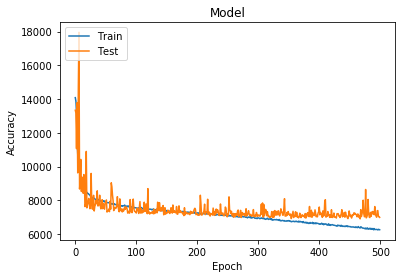

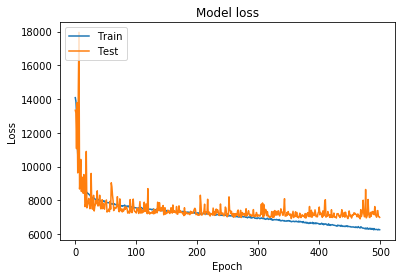

Optimizer: rmsprop, Initializer: normal, Loss: mean_absolute_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 128)               4224      
_________________________________________________________________
elu_51 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_52 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_53 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_64 

8415/8415 [==============================] - 3s 307us/step - loss: 146208614.4706 - mean_squared_error: 146208614.4706 - val_loss: 132957821.1400 - val_mean_squared_error: 132957821.1400
Epoch 74/500
8415/8415 [==============================] - 2s 285us/step - loss: 143724395.4135 - mean_squared_error: 143724395.4135 - val_loss: 126697307.9800 - val_mean_squared_error: 126697307.9800
Epoch 75/500
8415/8415 [==============================] - 2s 269us/step - loss: 144956908.2692 - mean_squared_error: 144956908.2692 - val_loss: 157323762.0000 - val_mean_squared_error: 157323762.0000
Epoch 76/500
8415/8415 [==============================] - 2s 288us/step - loss: 145604727.7005 - mean_squared_error: 145604727.7005 - val_loss: 153345086.1600 - val_mean_squared_error: 153345086.1600
Epoch 77/500
8415/8415 [==============================] - 2s 280us/step - loss: 147173402.5062 - mean_squared_error: 147173402.5062 - val_loss: 125927408.6200 - val_mean_squared_error: 125927408.6200
Epoch 78/500


Epoch 114/500
8415/8415 [==============================] - 2s 263us/step - loss: 141567251.6257 - mean_squared_error: 141567251.6257 - val_loss: 125712573.6700 - val_mean_squared_error: 125712573.6700
Epoch 115/500
8415/8415 [==============================] - 2s 293us/step - loss: 140798621.8948 - mean_squared_error: 140798621.8948 - val_loss: 122815868.9200 - val_mean_squared_error: 122815868.9200
Epoch 116/500
8415/8415 [==============================] - 2s 294us/step - loss: 141986268.1783 - mean_squared_error: 141986268.1783 - val_loss: 135471626.1800 - val_mean_squared_error: 135471626.1800
Epoch 117/500
8415/8415 [==============================] - 2s 291us/step - loss: 140849398.7986 - mean_squared_error: 140849398.7986 - val_loss: 124364578.6600 - val_mean_squared_error: 124364578.6600
Epoch 118/500
8415/8415 [==============================] - 2s 270us/step - loss: 139840884.9679 - mean_squared_error: 139840884.9679 - val_loss: 123112552.2200 - val_mean_squared_error: 123112552.

Epoch 155/500
8415/8415 [==============================] - 2s 257us/step - loss: 137577675.7005 - mean_squared_error: 137577675.7005 - val_loss: 124813186.3600 - val_mean_squared_error: 124813186.3600
Epoch 156/500
8415/8415 [==============================] - 2s 262us/step - loss: 135351905.6791 - mean_squared_error: 135351905.6791 - val_loss: 129239572.6200 - val_mean_squared_error: 129239572.6200
Epoch 157/500
8415/8415 [==============================] - 2s 259us/step - loss: 137829645.7932 - mean_squared_error: 137829645.7932 - val_loss: 133606772.8800 - val_mean_squared_error: 133606772.8800
Epoch 158/500
8415/8415 [==============================] - 2s 258us/step - loss: 136873844.1765 - mean_squared_error: 136873844.1765 - val_loss: 128693238.4000 - val_mean_squared_error: 128693238.4000
Epoch 159/500
8415/8415 [==============================] - 2s 258us/step - loss: 135814699.9501 - mean_squared_error: 135814699.9501 - val_loss: 122404199.8400 - val_mean_squared_error: 122404199.

Epoch 196/500
8415/8415 [==============================] - 2s 258us/step - loss: 133794511.5009 - mean_squared_error: 133794511.5009 - val_loss: 125052407.0400 - val_mean_squared_error: 125052407.0400
Epoch 197/500
8415/8415 [==============================] - 2s 259us/step - loss: 131909114.8984 - mean_squared_error: 131909114.8984 - val_loss: 119284678.9600 - val_mean_squared_error: 119284678.9600
Epoch 198/500
8415/8415 [==============================] - 2s 257us/step - loss: 134737004.1711 - mean_squared_error: 134737004.1711 - val_loss: 173646585.3600 - val_mean_squared_error: 173646585.3600
Epoch 199/500
8415/8415 [==============================] - 2s 257us/step - loss: 132406253.8342 - mean_squared_error: 132406253.8342 - val_loss: 127587335.9600 - val_mean_squared_error: 127587335.9600
Epoch 200/500
8415/8415 [==============================] - 2s 259us/step - loss: 132784652.4599 - mean_squared_error: 132784652.4599 - val_loss: 129698529.8000 - val_mean_squared_error: 129698529.

Epoch 237/500
8415/8415 [==============================] - 2s 259us/step - loss: 131656555.3904 - mean_squared_error: 131656555.3904 - val_loss: 121844627.7600 - val_mean_squared_error: 121844627.7600
Epoch 238/500
8415/8415 [==============================] - 2s 257us/step - loss: 130515809.1836 - mean_squared_error: 130515809.1836 - val_loss: 123639380.7600 - val_mean_squared_error: 123639380.7600
Epoch 239/500
8415/8415 [==============================] - 2s 260us/step - loss: 130372800.9430 - mean_squared_error: 130372800.9430 - val_loss: 143181628.5200 - val_mean_squared_error: 143181628.5200
Epoch 240/500
8415/8415 [==============================] - 2s 257us/step - loss: 131240216.2424 - mean_squared_error: 131240216.2424 - val_loss: 126003486.7600 - val_mean_squared_error: 126003486.7600
Epoch 241/500
8415/8415 [==============================] - 2s 262us/step - loss: 131117833.5971 - mean_squared_error: 131117833.5971 - val_loss: 119558420.2200 - val_mean_squared_error: 119558420.

Epoch 278/500
8415/8415 [==============================] - 2s 256us/step - loss: 127718614.8841 - mean_squared_error: 127718614.8841 - val_loss: 133251321.5600 - val_mean_squared_error: 133251321.5600
Epoch 279/500
8415/8415 [==============================] - 2s 256us/step - loss: 128707502.7166 - mean_squared_error: 128707502.7166 - val_loss: 136884675.5600 - val_mean_squared_error: 136884675.5600
Epoch 280/500
8415/8415 [==============================] - 2s 256us/step - loss: 127641758.6381 - mean_squared_error: 127641758.6381 - val_loss: 125335607.3800 - val_mean_squared_error: 125335607.3800
Epoch 281/500
8415/8415 [==============================] - 2s 259us/step - loss: 127937045.3119 - mean_squared_error: 127937045.3119 - val_loss: 122268582.6800 - val_mean_squared_error: 122268582.6800
Epoch 282/500
8415/8415 [==============================] - 2s 258us/step - loss: 128613270.4135 - mean_squared_error: 128613270.4135 - val_loss: 117837264.5600 - val_mean_squared_error: 117837264.

Epoch 319/500
8415/8415 [==============================] - 2s 256us/step - loss: 126935460.7968 - mean_squared_error: 126935460.7968 - val_loss: 126371908.5600 - val_mean_squared_error: 126371908.5600
Epoch 320/500
8415/8415 [==============================] - 2s 260us/step - loss: 126186697.7344 - mean_squared_error: 126186697.7344 - val_loss: 171463831.3600 - val_mean_squared_error: 171463831.3600
Epoch 321/500
8415/8415 [==============================] - 2s 257us/step - loss: 125963612.8538 - mean_squared_error: 125963612.8538 - val_loss: 118735469.1200 - val_mean_squared_error: 118735469.1200
Epoch 322/500
8415/8415 [==============================] - 2s 258us/step - loss: 125615472.3226 - mean_squared_error: 125615472.3226 - val_loss: 124733115.4800 - val_mean_squared_error: 124733115.4800
Epoch 323/500
8415/8415 [==============================] - 2s 256us/step - loss: 126589014.8182 - mean_squared_error: 126589014.8182 - val_loss: 118250280.9800 - val_mean_squared_error: 118250280.

Epoch 360/500
8415/8415 [==============================] - 2s 257us/step - loss: 124602348.9305 - mean_squared_error: 124602348.9305 - val_loss: 123668541.6000 - val_mean_squared_error: 123668541.6000
Epoch 361/500
8415/8415 [==============================] - 2s 260us/step - loss: 124851501.9358 - mean_squared_error: 124851501.9358 - val_loss: 120391589.1000 - val_mean_squared_error: 120391589.1000
Epoch 362/500
8415/8415 [==============================] - 2s 256us/step - loss: 124768061.4866 - mean_squared_error: 124768061.4866 - val_loss: 123898078.0800 - val_mean_squared_error: 123898078.0800
Epoch 363/500
8415/8415 [==============================] - 2s 258us/step - loss: 127790907.0143 - mean_squared_error: 127790907.0143 - val_loss: 129635537.7600 - val_mean_squared_error: 129635537.7600
Epoch 364/500
8415/8415 [==============================] - 2s 256us/step - loss: 124956754.9964 - mean_squared_error: 124956754.9964 - val_loss: 119961667.7200 - val_mean_squared_error: 119961667.

Epoch 401/500
8415/8415 [==============================] - 2s 258us/step - loss: 124174563.9162 - mean_squared_error: 124174563.9162 - val_loss: 121149758.9200 - val_mean_squared_error: 121149758.9200
Epoch 402/500
8415/8415 [==============================] - 2s 258us/step - loss: 123468786.1355 - mean_squared_error: 123468786.1355 - val_loss: 123298916.9400 - val_mean_squared_error: 123298916.9400
Epoch 403/500
8415/8415 [==============================] - 2s 257us/step - loss: 124024019.0000 - mean_squared_error: 124024019.0000 - val_loss: 135548239.7600 - val_mean_squared_error: 135548239.7600
Epoch 404/500
8415/8415 [==============================] - 2s 259us/step - loss: 123567276.0463 - mean_squared_error: 123567276.0463 - val_loss: 125506709.4400 - val_mean_squared_error: 125506709.4400
Epoch 405/500
8415/8415 [==============================] - 2s 255us/step - loss: 125037365.4474 - mean_squared_error: 125037365.4474 - val_loss: 125808531.6400 - val_mean_squared_error: 125808531.

Epoch 442/500
8415/8415 [==============================] - 2s 263us/step - loss: 122479897.9002 - mean_squared_error: 122479897.9002 - val_loss: 123110079.9000 - val_mean_squared_error: 123110079.9000
Epoch 443/500
8415/8415 [==============================] - 2s 263us/step - loss: 121465075.8324 - mean_squared_error: 121465075.8324 - val_loss: 127832327.9200 - val_mean_squared_error: 127832327.9200
Epoch 444/500
8415/8415 [==============================] - 2s 263us/step - loss: 121737097.8449 - mean_squared_error: 121737097.8449 - val_loss: 122985657.7600 - val_mean_squared_error: 122985657.7600
Epoch 445/500
8415/8415 [==============================] - 2s 260us/step - loss: 121437052.2513 - mean_squared_error: 121437052.2513 - val_loss: 118773834.9000 - val_mean_squared_error: 118773834.9000
Epoch 446/500
8415/8415 [==============================] - 2s 262us/step - loss: 119997246.0838 - mean_squared_error: 119997246.0838 - val_loss: 125288644.8400 - val_mean_squared_error: 125288644.

Epoch 483/500
8415/8415 [==============================] - 2s 256us/step - loss: 120486535.7041 - mean_squared_error: 120486535.7041 - val_loss: 121493412.1000 - val_mean_squared_error: 121493412.1000
Epoch 484/500
8415/8415 [==============================] - 2s 267us/step - loss: 120221557.2674 - mean_squared_error: 120221557.2674 - val_loss: 127419738.7600 - val_mean_squared_error: 127419738.7600
Epoch 485/500
8415/8415 [==============================] - 2s 266us/step - loss: 119414253.2442 - mean_squared_error: 119414253.2442 - val_loss: 118564105.4400 - val_mean_squared_error: 118564105.4400
Epoch 486/500
8415/8415 [==============================] - 2s 263us/step - loss: 119798599.0811 - mean_squared_error: 119798599.0811 - val_loss: 123151637.0600 - val_mean_squared_error: 123151637.0600
Epoch 487/500
8415/8415 [==============================] - 2s 260us/step - loss: 120362179.9857 - mean_squared_error: 120362179.9857 - val_loss: 137574181.0000 - val_mean_squared_error: 137574181.

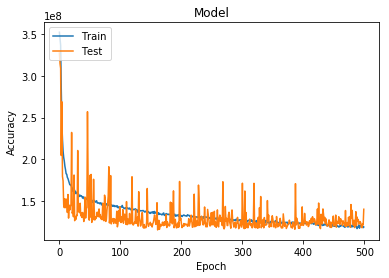

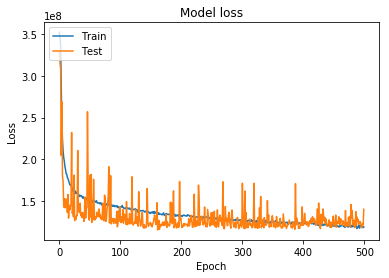

Optimizer: rmsprop, Initializer: uniform, Loss: mean_squared_error
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 128)               4224      
_________________________________________________________________
elu_56 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_57 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 128)               16512     
_________________________________________________________________
elu_58 (ELU)                 (None, 128)               0         
_________________________________________________________________
dense_70 

8415/8415 [==============================] - 2s 262us/step - loss: 7686.4778 - mean_absolute_error: 7686.4778 - val_loss: 7377.0275 - val_mean_absolute_error: 7377.0275
Epoch 81/500
8415/8415 [==============================] - 2s 259us/step - loss: 7675.3175 - mean_absolute_error: 7675.3175 - val_loss: 7611.0263 - val_mean_absolute_error: 7611.0263
Epoch 82/500
8415/8415 [==============================] - 2s 262us/step - loss: 7667.1000 - mean_absolute_error: 7667.1000 - val_loss: 7450.4220 - val_mean_absolute_error: 7450.4220
Epoch 83/500
8415/8415 [==============================] - 2s 261us/step - loss: 7672.0416 - mean_absolute_error: 7672.0416 - val_loss: 7478.9730 - val_mean_absolute_error: 7478.9730
Epoch 84/500
8415/8415 [==============================] - 2s 262us/step - loss: 7640.7968 - mean_absolute_error: 7640.7968 - val_loss: 8198.0207 - val_mean_absolute_error: 8198.0207
Epoch 85/500
8415/8415 [==============================] - 2s 261us/step - loss: 7633.5370 - mean_absolu

Epoch 125/500
8415/8415 [==============================] - 2s 258us/step - loss: 7438.5859 - mean_absolute_error: 7438.5859 - val_loss: 7222.6377 - val_mean_absolute_error: 7222.6377
Epoch 126/500
8415/8415 [==============================] - 2s 257us/step - loss: 7414.0022 - mean_absolute_error: 7414.0022 - val_loss: 7316.5953 - val_mean_absolute_error: 7316.5953
Epoch 127/500
8415/8415 [==============================] - 2s 263us/step - loss: 7442.1228 - mean_absolute_error: 7442.1228 - val_loss: 7331.1421 - val_mean_absolute_error: 7331.1421
Epoch 128/500
8415/8415 [==============================] - 2s 258us/step - loss: 7402.5788 - mean_absolute_error: 7402.5788 - val_loss: 7238.4137 - val_mean_absolute_error: 7238.4137
Epoch 129/500
8415/8415 [==============================] - 2s 259us/step - loss: 7409.9865 - mean_absolute_error: 7409.9865 - val_loss: 7275.9104 - val_mean_absolute_error: 7275.9104
Epoch 130/500
8415/8415 [==============================] - 2s 260us/step - loss: 7480

Epoch 170/500
8415/8415 [==============================] - 2s 255us/step - loss: 7341.7305 - mean_absolute_error: 7341.7305 - val_loss: 7396.5030 - val_mean_absolute_error: 7396.5030
Epoch 171/500
8415/8415 [==============================] - 2s 256us/step - loss: 7347.9240 - mean_absolute_error: 7347.9240 - val_loss: 7251.4927 - val_mean_absolute_error: 7251.4927
Epoch 172/500
8415/8415 [==============================] - 2s 256us/step - loss: 7267.6578 - mean_absolute_error: 7267.6578 - val_loss: 7119.2911 - val_mean_absolute_error: 7119.2911
Epoch 173/500
8415/8415 [==============================] - 2s 256us/step - loss: 7321.9613 - mean_absolute_error: 7321.9613 - val_loss: 7683.1554 - val_mean_absolute_error: 7683.1554
Epoch 174/500
8415/8415 [==============================] - 2s 256us/step - loss: 7306.1610 - mean_absolute_error: 7306.1610 - val_loss: 7180.3849 - val_mean_absolute_error: 7180.3849
Epoch 175/500
8415/8415 [==============================] - 2s 257us/step - loss: 7277

Epoch 215/500
8415/8415 [==============================] - 2s 258us/step - loss: 7194.0121 - mean_absolute_error: 7194.0121 - val_loss: 7313.1288 - val_mean_absolute_error: 7313.1288
Epoch 216/500
8415/8415 [==============================] - 2s 257us/step - loss: 7138.6275 - mean_absolute_error: 7138.6275 - val_loss: 7332.4199 - val_mean_absolute_error: 7332.4199
Epoch 217/500
8415/8415 [==============================] - 2s 255us/step - loss: 7139.9266 - mean_absolute_error: 7139.9266 - val_loss: 7067.0533 - val_mean_absolute_error: 7067.0533
Epoch 218/500
8415/8415 [==============================] - 2s 256us/step - loss: 7137.4533 - mean_absolute_error: 7137.4533 - val_loss: 7267.9677 - val_mean_absolute_error: 7267.9677
Epoch 219/500
8415/8415 [==============================] - 2s 257us/step - loss: 7157.8476 - mean_absolute_error: 7157.8476 - val_loss: 7303.5066 - val_mean_absolute_error: 7303.5066
Epoch 220/500
8415/8415 [==============================] - 2s 259us/step - loss: 7132

Epoch 260/500
8415/8415 [==============================] - 2s 257us/step - loss: 7028.9727 - mean_absolute_error: 7028.9727 - val_loss: 7185.8385 - val_mean_absolute_error: 7185.8385
Epoch 261/500
8415/8415 [==============================] - 2s 257us/step - loss: 7000.0099 - mean_absolute_error: 7000.0099 - val_loss: 7064.9367 - val_mean_absolute_error: 7064.9367
Epoch 262/500
8415/8415 [==============================] - 2s 261us/step - loss: 7035.6115 - mean_absolute_error: 7035.6115 - val_loss: 7438.2420 - val_mean_absolute_error: 7438.2420
Epoch 263/500
8415/8415 [==============================] - 2s 257us/step - loss: 6989.8478 - mean_absolute_error: 6989.8478 - val_loss: 7087.5359 - val_mean_absolute_error: 7087.5359
Epoch 264/500
8415/8415 [==============================] - 2s 258us/step - loss: 6987.4167 - mean_absolute_error: 6987.4167 - val_loss: 7597.3252 - val_mean_absolute_error: 7597.3252
Epoch 265/500
8415/8415 [==============================] - 2s 256us/step - loss: 7009

Epoch 305/500
8415/8415 [==============================] - 2s 255us/step - loss: 6892.9937 - mean_absolute_error: 6892.9937 - val_loss: 7941.0004 - val_mean_absolute_error: 7941.0004
Epoch 306/500
8415/8415 [==============================] - 2s 253us/step - loss: 6859.5456 - mean_absolute_error: 6859.5456 - val_loss: 7163.7324 - val_mean_absolute_error: 7163.7324
Epoch 307/500
8415/8415 [==============================] - 2s 258us/step - loss: 6880.5540 - mean_absolute_error: 6880.5540 - val_loss: 7013.8873 - val_mean_absolute_error: 7013.8873
Epoch 308/500
8415/8415 [==============================] - 2s 258us/step - loss: 6862.9219 - mean_absolute_error: 6862.9219 - val_loss: 7159.3311 - val_mean_absolute_error: 7159.3311
Epoch 309/500
8415/8415 [==============================] - 2s 259us/step - loss: 6922.3476 - mean_absolute_error: 6922.3476 - val_loss: 7063.0541 - val_mean_absolute_error: 7063.0541
Epoch 310/500
8415/8415 [==============================] - 2s 253us/step - loss: 6851

Epoch 350/500
8415/8415 [==============================] - 2s 257us/step - loss: 6750.7539 - mean_absolute_error: 6750.7539 - val_loss: 7183.8985 - val_mean_absolute_error: 7183.8985
Epoch 351/500
8415/8415 [==============================] - 2s 256us/step - loss: 6743.2931 - mean_absolute_error: 6743.2931 - val_loss: 7583.8650 - val_mean_absolute_error: 7583.8650
Epoch 352/500
8415/8415 [==============================] - 2s 256us/step - loss: 6771.2499 - mean_absolute_error: 6771.2499 - val_loss: 6998.2086 - val_mean_absolute_error: 6998.2086
Epoch 353/500
8415/8415 [==============================] - 2s 258us/step - loss: 6708.8291 - mean_absolute_error: 6708.8291 - val_loss: 7159.8683 - val_mean_absolute_error: 7159.8683
Epoch 354/500
8415/8415 [==============================] - 2s 258us/step - loss: 6675.6860 - mean_absolute_error: 6675.6860 - val_loss: 7023.7534 - val_mean_absolute_error: 7023.7534
Epoch 355/500
8415/8415 [==============================] - 2s 257us/step - loss: 6743

Epoch 395/500
8415/8415 [==============================] - 2s 257us/step - loss: 6568.1571 - mean_absolute_error: 6568.1571 - val_loss: 7106.7507 - val_mean_absolute_error: 7106.7507
Epoch 396/500
8415/8415 [==============================] - 2s 257us/step - loss: 6534.9180 - mean_absolute_error: 6534.9180 - val_loss: 7269.4272 - val_mean_absolute_error: 7269.4272
Epoch 397/500
8415/8415 [==============================] - 2s 273us/step - loss: 6563.3250 - mean_absolute_error: 6563.3250 - val_loss: 7041.2760 - val_mean_absolute_error: 7041.2760
Epoch 398/500
8415/8415 [==============================] - 2s 272us/step - loss: 6582.8960 - mean_absolute_error: 6582.8960 - val_loss: 7376.4212 - val_mean_absolute_error: 7376.4212
Epoch 399/500
8415/8415 [==============================] - 2s 260us/step - loss: 6546.0189 - mean_absolute_error: 6546.0189 - val_loss: 6945.2221 - val_mean_absolute_error: 6945.2221
Epoch 400/500
8415/8415 [==============================] - 2s 263us/step - loss: 6545

Epoch 440/500
8415/8415 [==============================] - 2s 261us/step - loss: 6344.7471 - mean_absolute_error: 6344.7471 - val_loss: 7076.4053 - val_mean_absolute_error: 7076.4053
Epoch 441/500
8415/8415 [==============================] - 2s 259us/step - loss: 6326.5854 - mean_absolute_error: 6326.5854 - val_loss: 7312.8893 - val_mean_absolute_error: 7312.8893
Epoch 442/500
8415/8415 [==============================] - 2s 255us/step - loss: 6385.4021 - mean_absolute_error: 6385.4021 - val_loss: 7023.2261 - val_mean_absolute_error: 7023.2261
Epoch 443/500
8415/8415 [==============================] - 2s 259us/step - loss: 6333.0246 - mean_absolute_error: 6333.0246 - val_loss: 7079.8375 - val_mean_absolute_error: 7079.8375
Epoch 444/500
8415/8415 [==============================] - 2s 257us/step - loss: 6382.4775 - mean_absolute_error: 6382.4775 - val_loss: 7237.6351 - val_mean_absolute_error: 7237.6351
Epoch 445/500
8415/8415 [==============================] - 2s 257us/step - loss: 6350

Epoch 485/500
8415/8415 [==============================] - 2s 255us/step - loss: 6126.1342 - mean_absolute_error: 6126.1342 - val_loss: 7277.9345 - val_mean_absolute_error: 7277.9345
Epoch 486/500
8415/8415 [==============================] - 2s 255us/step - loss: 6226.9028 - mean_absolute_error: 6226.9028 - val_loss: 7051.3394 - val_mean_absolute_error: 7051.3394
Epoch 487/500
8415/8415 [==============================] - 2s 257us/step - loss: 6074.3163 - mean_absolute_error: 6074.3163 - val_loss: 7279.5575 - val_mean_absolute_error: 7279.5575
Epoch 488/500
8415/8415 [==============================] - 2s 256us/step - loss: 6135.9411 - mean_absolute_error: 6135.9411 - val_loss: 7218.8864 - val_mean_absolute_error: 7218.8864
Epoch 489/500
8415/8415 [==============================] - 2s 256us/step - loss: 6099.7558 - mean_absolute_error: 6099.7558 - val_loss: 7034.2584 - val_mean_absolute_error: 7034.2584
Epoch 490/500
8415/8415 [==============================] - 2s 256us/step - loss: 6103

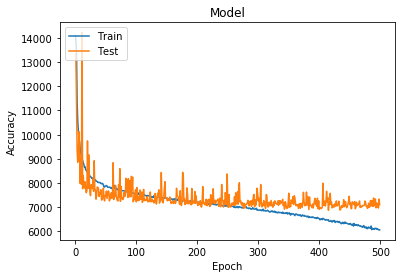

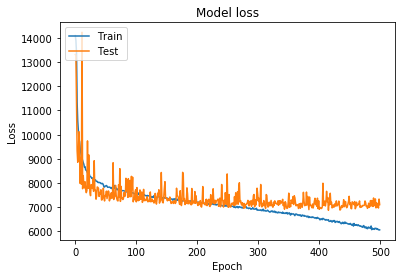

Optimizer: rmsprop, Initializer: uniform, Loss: mean_absolute_error


In [3]:
if __name__ == "__main__":
    path = "C:/Users/amogh/Desktop/SBMP/6th sem/Project/Dataset/Crops/train_data2.csv"

    X_train, X_test, y_train, y_test = loadData(path)
    optimizer = ['adam', 'rmsprop']
    init = ['glorot_uniform', 'normal', 'uniform']
    loss = ["mean_squared_error", "mean_absolute_error"]

    for i in optimizer:
        for j in init:
            for k in loss:
                model = NNModel(X_train, i, j, k)
                trainModel(model, X_train, X_test, y_train, y_test, k)
                print(f"Optimizer: {i}, Initializer: {j}, Loss: {k}")


In [5]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df['code'],
    z = df['total exports'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Millions USD")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2011 US Agriculture Exports by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.